In [0]:
!ls /usr/lib/jvm/

default-java  java-1.8.0-openjdk-amd64	java-8-openjdk-amd64


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar xf /content/spark-2.4.3-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"
#!export JAVA_HOME=$(/usr/libexec/java_home -v 1.8)

In [0]:
!sudo update-alternatives --config java
!java -version

update-alternatives: warning: /etc/alternatives/java is dangling; it will be updated with best choice
There is only one alternative in link group java (providing /usr/bin/java): /usr/lib/jvm/java-11-openjdk-amd64/bin/java
Nothing to configure.
/bin/bash: java: command not found


In [0]:
import findspark
#findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
!cat /proc/cpuinfo
!df -h
!cat /proc/meminfo

In [0]:
#GPU count and name
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-42832ab3-0210-fd2e-bc3f-62bc868f02df)


In [0]:
#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

In [0]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz


In [0]:
#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

Socket(s):           1


In [0]:
#no.of cores each processor is having 
!lscpu | grep 'Core(s) per socket:'

Core(s) per socket:  2


In [0]:
#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

Thread(s) per core:  2


In [0]:
!lscpu | grep "L3 cache"

L3 cache:            46080K


In [0]:
#if it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency this means it always operates at 2.3GHz
!lscpu | grep "MHz"

CPU MHz:             2300.000


In [0]:
#memory that we can use
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   25813420 kB


In [0]:
#hard disk that we can use
!df -h / | awk '{print $4}'

Avail
287G


In [0]:
# removing any existing cuda
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

In [0]:
# cuda 10.1
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt update -q
!apt install cuda gcc-6 g++-6 -y -q
!ln -s /usr/bin/gcc-6 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-6 /usr/local/cuda/bin/g++

In [0]:
# cuda 9.2
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2
######################## for cuda 10.1
# !apt update -q
# !apt install cuda gcc-6 g++-6 -y -q
# !ln -s /usr/bin/gcc-6 /usr/local/cuda/bin/gcc
# !ln -s /usr/bin/g++-6 /usr/local/cuda/bin/g++

In [0]:
# Execute the given command to install a small extension to run nvcc from Notebook cells
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
# install maxnet-cu92
!pip install mxnet-cu92

In [0]:
# install julia
!curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.0/julia-1.0.0-linux-x86_64.tar.gz" -o julia.tar.gz
!tar -xzf julia.tar.gz -C /usr --strip-components 1
!rm -rf julia.tar.gz*
!julia -e 'using Pkg; pkg"add IJulia; add CuArrays; add Flux; precompile"'

In [0]:
# Check your version using this code
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [0]:
# Load the extension using this code
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [0]:
# Execute the code below to check if CUDA is working. To run CUDA C/C++ code in your notebook, add the %%cu extension at the beginning of your code.
%%cu
#include <stdio.h>
#include <stdlib.h>
__global__ void add(int *a, int *b, int *c) {
*c = *a + *b;
}
int main() {
int a, b, c;
// host copies of variables a, b & c
int *d_a, *d_b, *d_c;
// device copies of variables a, b & c
int size = sizeof(int);
// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);
// Setup input values  
c = 0;
a = 3;
b = 5;
// Copy inputs to device
cudaMemcpy(d_a, &a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, &b, size, cudaMemcpyHostToDevice);
// Launch add() kernel on GPU
add<<<1,1>>>(d_a, d_b, d_c);
// Copy result back to host
cudaError err = cudaMemcpy(&c, d_c, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }
printf("result is %d\n",c);
// Cleanup
cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);
return 0;
}

result is 8



In [0]:
# google colab operations
# !python3 "/content/gdrive/My Drive/My Thesis/mnist_cnn.py"

# !git clone https://github.com/wxs/keras-mnist-tutorial.git

# "/content/gdrive/My Drive/My Thesis/"
!wget https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/12551780/bio_embedding_extrinsic -P '/content/gdrive/My Drive/My Thesis/'

In [0]:
import os, sys
#from google.colab import drive
#drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)

In [0]:
!pip3 install --target=$nb_path --upgrade setuptools
!pip3 install --target=$nb_path "tensorflow>=1.7"
!pip3 install --target=$nb_path tensorflow-gpu
# Install TF-Hub.
!pip3 install --target=$nb_path tensorflow-hub
# Install other packages.
!pip3 install --target=$nb_path seaborn
# Install SentencePiece package
# SentencePiece package is needed for Universal Sentence Encoder Lite. We'll
# use it for all the text processing and sentence feature ID lookup.
!pip3 install --target=$nb_path sentencepiece
!pip3 install --target=$nb_path cython
!pip3 install --target=$nb_path numpy
!pip3 install --target=$nb_path scipy
!pip3 install --target=$nb_path pandas
!pip3 install --target=$nb_path --upgrade -U gensim
!pip3 install --target=$nb_path --upgrade spacy
!pip3 install --target=$nb_path nltk
!pip3 install --target=$nb_path multiprocessing
!pip3 install --target=$nb_path tqdm
!pip3 install --target=$nb_path sklearn
!pip3 install --target=$nb_path shorttext
!pip3 install --target=$nb_path matplotlib
!pip3 install --target=$nb_path torch torchvision
!python3 --target=$nb_path -m spacy download en
!python3 --target=$nb_path -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg
!pip3 install --target=$nb_path --upgrade fse
!pip3 install --target=$nb_path git+https://github.com/oborchers/Fast_Sentence_Embeddings
!pip3 install --target=$nb_path pyfasttext
!pip3 install --target=$nb_path py_stringmatching
!pip3 install --target=$nb_path keras
!pip3 install --target=$nb_path pyemd
!pip3 install --target=$nb_path pycuda
!pip3 install --target=$nb_path ray
!pip3 install --target=$nb_path mxnet-cu92
!pip3 install --target=$nb_path gluonnlp
!pip3 install --target=$nb_path mxnet-mkl
!pip3 install --target=$nb_path python-Levenshtein
!pip3 install --target=$nb_path fuzzywuzzy
!pip3 install --target=$nb_path shorttext
# !pip3 install --target=$nb_path pykeops
!pip3 install --target=$nb_path -U spacy[cuda92]
!sh -c 'echo deb https://apt.repos.intel.com/mkl all main > /etc/apt/sources.list.d/intel-mkl.list'
!pip3 install --target=$nb_path shorttext
!pip3 install --target=$nb_path python-Levenshtein
!pip3 install --target=$nb_path fuzzywuzzy
!pip3 install --target=$nb_path --upgrade gensim
!pip3 install --target=$nb_path --upgrade fse

In [0]:
#!pip3 install spacy
#!python -m spacy download en_core_web_md
#!python3 -m spacy download en_core_web_md
#import spacy
# --target=$nb_path
#!pip3 install --target=$nb_path torch torchvision
#!pip3 install --target=$nb_path shorttext
#spacy.load('en_core_web_sm')
!pip install --target=$nb_path wmd

     |████████████████████████████████| 112kB 2.8MB/s 
  Created wheel for wmd: filename=wmd-1.3.1-cp36-cp36m-linux_x86_64.whl size=629299 sha256=55c54eb89acde135d21c1fc9ef083a9850908677c75536cd905286d4bb05e64b
  Stored in directory: /root/.cache/pip/wheels/87/b8/02/90eb4f593d4227b8fa2882aed18193b83a0ebe4dba191f1113
Successfully built wmd


In [0]:
#!pip3 install --target=$nb_path tensorflow-gpu
#import tensorflow as tf
#tf.test.gpu_device_name()
# !pip3 install --target=$nb_path 

!pip3 install shorttext
!pip3 install python-Levenshtein
!pip3 install fuzzywuzzy
!pip3 install gensim==3.8.0
!pip3 install --upgrade fse
#!pip3 install -U spacy[cuda92]

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/My Thesis/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import time
from gensim.test.utils import datapath, get_tmpfile
from tqdm import tqdm
from gensim.corpora import Dictionary
from gensim.models.word2vec import Word2Vec
from gensim.models import LsiModel, TfidfModel, KeyedVectors, keyedvectors, WordEmbeddingSimilarityIndex
from gensim.similarities import MatrixSimilarity, SparseMatrixSimilarity, LevenshteinSimilarityIndex
from gensim.similarities import WmdSimilarity, Similarity, SoftCosineSimilarity, TermSimilarityIndex, SparseTermSimilarityMatrix
from gensim.models.fasttext import FastText as FT, FastTextKeyedVectors, load_facebook_model, load_facebook_vectors
import spacy
import torch
import string
import nltk
import csv
#from infersentmodel import InferSent
from shorttext.utils.wordembed import load_fasttext_model, load_poincare_model, load_word2vec_model
from shorttext.metrics.wasserstein import word_mover_distance
from shorttext.metrics.embedfuzzy import jaccardscore_sents
from shorttext.metrics.dynprog import damerau_levenshtein, longest_common_prefix, similarity, soft_jaccard_score
from fuzzywuzzy import fuzz
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('brown')
nltk.download('wordnet')
import pandas as pd
from nltk.corpus import stopwords
import gensim
from gensim.matutils import softcossim
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
#from ts_ss import TS_SS
import multiprocessing
from scipy.spatial.distance import cosine
import logging
#from fse.models import Sentence2Vec
#from fse.models.sentence2vec import CY_ROUTINES
#%load_ext Cython
#assert CY_ROUTINES
# form zipfile import ZipFile
import zipfile

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
# TESTTTTT
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

path = get_tmpfile("word2vec.model")

model = Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)    
sentences = [['karimi', 'hamed'], ['karimi', 'shahed','hello', 'world']]
model.build_vocab(sentences, update=True)
model.train(sentences, total_examples=model.corpus_count, epochs=5)
# train word2vec on the two sentences
#model = gensim.models.Word2Vec(sentences, min_count=1)

In [0]:
# model.wv.most_similar('hamed')
!python -m nltk.downloader omw
!pip3 install spacy-wordnet

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
     |████████████████████████████████| 655kB 6.6MB/s 
     |████████████████████████████████| 1.4MB 41.6MB/s 
  Created wheel for spacy-wordnet: filename=spacy_wordnet-0.0.4-py2.py3-none-any.whl size=650293 sha256=616396fb28d9764e0afa969d40004a29b41a1ed21579739eae603328191f020b
  Stored in directory: /root/.cache/pip/wheels/25/93/1d/c86db913cd146fc9ddb26d10f56579c5d58a3e00bc8f96a3a6
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394468 sha256=b4441c4be778c5ed944fcab6a510b7bee2d1673a359e7d71e1bcb0cf839d2313
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built spacy

In [0]:
# ######################################## Function Timing ##########################################

# start = time.time()
# a function
# print('TIME:', time.time() - start)

def timing(f):
    def wrap(*args, **kwargs):
        time1 = time.time()
        ret = f(*args, **kwargs)
        time2 = time.time()
        print('{:s} function took {:.4f} (s)'.format(f.__name__, (time2-time1)))
        return ret
    return wrap


In [0]:
import time
from gensim.test.utils import datapath, get_tmpfile
from tqdm import tqdm
from gensim.corpora import Dictionary
from gensim.models.word2vec import Word2Vec
from gensim.models import LsiModel, TfidfModel, KeyedVectors, keyedvectors, WordEmbeddingSimilarityIndex
from gensim.similarities import MatrixSimilarity, SparseMatrixSimilarity, LevenshteinSimilarityIndex
from gensim.similarities import WmdSimilarity, Similarity, SoftCosineSimilarity, TermSimilarityIndex, SparseTermSimilarityMatrix
from gensim.models.fasttext import FastText as FT, FastTextKeyedVectors, load_facebook_model, load_facebook_vectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from fuzzywuzzy import fuzz
from shorttext.utils.wordembed import load_fasttext_model, load_poincare_model, load_word2vec_model
from shorttext.metrics.wasserstein import word_mover_distance
from shorttext.metrics.embedfuzzy import jaccardscore_sents
from shorttext.metrics.dynprog import damerau_levenshtein, longest_common_prefix, similarity, soft_jaccard_score
#from infersentmodel import InferSent
import spacy
import string
import pandas as pd
from nltk.corpus import stopwords
import gensim
from gensim.matutils import softcossim
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from gensim.scripts.glove2word2vec import glove2word2vec
import numpy as np
import csv
# from ts_ss import TS_SS
import multiprocessing
from scipy.spatial.distance import cosine
# from fse.models import Sentence2Vec
# from fse.models.sentence2vec import CY_ROUTINES
#assert CY_ROUTINES
import logging
import zipfile

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
gensim.models.word2vec.FAST_VERSION = 1
FT.FAST_VERSION = 1
gensim.models.fasttext.FAST_VERSION = 1


# ####################################################################################################
@timing
def cleanup_text(docs):  # logging=False):
    texts = []
#   counter = 1
    for doc in docs:
        # if counter % 1000 == 0 and logging:
        #     print("Processed %d out of %d documents." % (counter, len(docs)))
        # counter += 1
        doc = nlp(doc)
        tokens = [tok.lemma_.strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        #tokens = ' '.join(tokens)  # to concatenate the words of each phrase
        texts.append(tokens)  # texts.extend(tokens)
    return texts  # pd.Series(texts)

# ########################################### PreProcessing #######################################

# tokenizer = ToktokTokenizer() # for using NLTK

google_pretrained_model = root_path + 'GoogleNews-vectors-negative300.bin.gz'
glove_pretrained_model = root_path + 'glove.840B.300d.txt'
bio_data1 = root_path + 'wikipedia-pubmed-and-PMC-w2v.bin'
bio_data2 = root_path + 'PubMed-and-PMC-w2v.bin'
bio_data3 = root_path + 'bio_nlp_vec.tar.gz'
ft_data = root_path + 'crawl-300d-2M.vec.zip'
#ft_data_vec = root_path + 'crawl-300d-2M-subword.zip'

cores = 2 * multiprocessing.cpu_count()
field_names_test=['ID','Relation','Value']
field_names=['ID','Value']
fields=['ID1','ID2']

spacy.prefer_gpu()
spacy.require_gpu()
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm', disable = ['tagger', 'parser', 'ner'])
stopwords = stopwords.words('english')
punctuations = string.punctuation

data = pd.read_csv(root_path + 'labels_with_genid.csv', sep=',', usecols =field_names, names=field_names)
data1 = pd.read_csv(root_path + 'human_labels.csv', sep=',', usecols =field_names, names=field_names)
data2 = pd.read_csv(root_path + 'mouse_labels.csv', sep=',', usecols =field_names, names=field_names)

# Label_text = [text for text in data[data['Relation'] == 'label']['Value']]
Label_text = [text for text in data['Value']]
Label_text1 = [text for text in data1['Value']]
Label_text2 = [text for text in data2['Value']]
clean_labels = cleanup_text(Label_text)
clean_labels1 = cleanup_text(Label_text1)
clean_labels2 = cleanup_text(Label_text2)

# Background Knowledge 
data['Value'] = clean_labels # [' '.join(sent) for sent in clean_labels]
bg = pd.read_csv(root_path + 'all bg.csv', sep=',', usecols =fields, names=fields)
clean_bg = []
for id1, id2 in tqdm(zip(bg['ID1'], bg['ID2'])):
    clean_bg.append(data[data['ID']==id1]['Value'].to_numpy()[0] + data[data['ID']==id2]['Value'].to_numpy()[0])


# from numpy.random import RandomState
# rf = pd.read_csv(root_path + 'reff.csv', sep=',', usecols =fields, names=fields)
# rng = RandomState()
# train = rf.sample(frac=0.6, random_state=rng)
# test = rf.loc[~rf.index.isin(train.index)]


#print(data['Value'])
#print(clean_bg)

cleanup_text function took 3.9899 (s)
cleanup_text function took 0.9314 (s)
cleanup_text function took 0.7710 (s)


15315it [00:43, 355.54it/s]


In [0]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
gensim.models.word2vec.FAST_VERSION = 1
FT.FAST_VERSION = 1
gensim.models.fasttext.FAST_VERSION = 1

# ####################################### Version 1 #################################################

# model1.add(['quoran'],model1.get_vector('Quoran'),replace=False)
# if 'quoran' in model1.vocab:
new_bio1 = root_path + 'bio_embedding_intrinsic'
new_bio2 = root_path + 'bio_embedding_extrinsic'

@timing
def load_method(clean_corpus, pretrained=google_pretrained_model, bin=True, is_kv=True,
                is_glove=False, is_fasttext=False, loading=False):
    if is_kv and bin and is_fasttext:
        print('You CANNOT train when "is_kv=True" and "bin=True" and "is_fasttext=True" simultaneously...')
        return
#     if (not is_kv) and bin and (not is_fasttext):
#         print('You CANNOT train when "is_kv=False" and "bin=True" and "is_fasttext=False" simultaneously...')
#         return
    if (not is_kv) and bin and is_glove:
        print('You CANNOT train when "is_glove=True" and "is_kv=False" and "bin=True" simultaneously...')
        return
    start = time.time()
    if is_glove:
        if not loading:
            glove_input_file = pretrained
            word2vec_output_file = pretrained + '.word2vec'
            glove2word2vec(glove_input_file, word2vec_output_file)
            trained_glove = word2vec_output_file
        else:
            trained_glove = pretrained
        if is_kv:
            save_file = root_path + 'my_kv_glove.model'
            if not loading:
                model = KeyedVectors.load_word2vec_format(trained_glove, binary=bin)  # time: 185s
            else:
                model = KeyedVectors.load(trained_glove, mmap='r')
                model.wv.syn0norm = model.wv.syn0
        else:
            save_file = root_path + 'my_glove.model'
            model = gensim.models.Word2Vec.load(trained_glove)
            if not loading:
                model.build_vocab(clean_corpus, update=True)
                total_ex = model.corpus_count  # model.corpus_total_words
                model.train(clean_corpus, total_examples=total_ex, epochs=model.iter)
    else:
        if is_kv:
            if is_fasttext:
                model = FastTextKeyedVectors.load(pretrained, mmap='r')
                save_file = root_path + 'my_kv_fasttext.model'
            else:
                save_file = root_path + 'my_kv_w2v.model'
                model = KeyedVectors.load_word2vec_format(pretrained, binary=bin, unicode_errors='ignore') # time: 185s
                #model = KeyedVectors.load(pretrained, mmap='r')
#                 if bin:
#                     model = KeyedVectors.load_word2vec_format(pretrained, binary=bin) # time: 185s
#                 else:
#                     model = KeyedVectors.load(pretrained, mmap='r')
        else:
            if is_fasttext:
                save_file = root_path + 'my_fasttext.model'
                if bin:
                    if not loading:
                        model = load_facebook_model(pretrained)
                        model.build_vocab(clean_corpus, update=True)
                        total_ex = model.corpus_count  # model.corpus_total_words
                        model.train(clean_corpus, total_examples=total_ex, epochs=model.iter)
                    else:
                        model = load_facebook_vectors(pretrained)
                else:
                    model = FT.load(pretrained, mmap='r')
                    if not loading:
                        model.build_vocab(clean_corpus, update=True)
                        total_ex = model.corpus_count  # model.corpus_total_words
                        model.train(clean_corpus, total_examples=total_ex, epochs=model.iter)
            else:
                save_file = root_path + 'my_w2v'
                model = gensim.models.Word2Vec.load(pretrained, mmap='r')
                if not loading:
                    model.build_vocab(clean_corpus, update=True)
                    total_ex = model.corpus_count   # model.corpus_total_words
                    model.train(clean_corpus, total_examples=total_ex, epochs=model.iter)
    print('load_method TIME:', time.time() - start)
    if not loading:
        if is_fasttext:
            model.wv.init_sims(replace=True)  # L2 Normalization
            FastTextKeyedVectors.save_word2vec_format(model.wv, fname=save_file + '.bin', binary=True)
        else:
            model.delete_temporary_training_data(replace_word_vectors_with_normalized=True)
            model.wv.save_word2vec_format(save_file + '.bin', binary=True)
        # if not bin:
        model.wv.save(save_file + '.model')
    return model


#model0 = load_method(clean_labels, pretrained='gdrive/My Drive/My Thesis/my_new_bio_intersect_w2v.bin', bin=True, is_kv=True, is_glove=False, loading=True)

##model0 = load_method(clean_labels, pretrained=bio_data2, bin=True, is_kv=False, is_glove=False, loading=False)

# ######################### VERSION 2 ################################

@timing
def self_train_and_pretrained(clean_corpus, pretrained=google_pretrained_model, size=100,
                              bin=True, selff=True, is_fasttext=False):
#     if bin and is_fasttext and (not selff):
#         print('You CANNOT train when "selff=False" and "bin=True" and "is_fasttext=True" simultaneously...')
#         return
    start = time.time()
    if selff:
        if is_fasttext:
            save_file = root_path + 'my_new_self_fasttext'
            model = FT(size=size, min_count=1, iter=10, workers=cores, sg=1, hs=0, window=5, negative=20)  # workers=1, window=10
            model.build_vocab(clean_corpus)  # update=True if using load_facebook_model
            total_exfast = model.corpus_count  # model2.corpus_total_words
            model.train(clean_corpus, total_examples=total_exfast, epochs=model.epochs)
        else:
            save_file = root_path + 'my_new_self_w2v'
            model = Word2Vec(size=size, min_count=1, iter=10, workers=cores, sg=1, hs=0, window=5, sample=1e-4, negative=20) #workers=1, window=10
            model.build_vocab(clean_corpus)
            total_examples = model.corpus_count
            model.train(clean_corpus, total_examples=total_examples, epochs=model.iter)
    else:
        if is_fasttext:
            save_file = root_path+ 'my_fb_fasttext'
            # model = load_facebook_model(pretrained)
            model = FT.load_fasttext_format(pretrained, encoding='utf-8')
            model.build_vocab(clean_corpus, update=True)  # update=True if using load_facebook_model
            total_exfast = model.corpus_count  # model.corpus_total_words
            model.train(clean_corpus, total_examples=total_exfast, epochs=model.epochs)
        else:
            save_file = root_path + 'my_new_bio_intersect_w2v'
            model = Word2Vec(size=size, min_count=1, iter=10, workers=cores, sg=1, hs=0, window=5, sample=1e-4, negative=10) # workers=1, window=10
            model.build_vocab(clean_corpus)
            model_pre = KeyedVectors.load_word2vec_format(pretrained, binary=bin)#, limit=3000000)
            #model_pre = KeyedVectors.load(pretrained, mmap='r')
            model.build_vocab([list(model_pre.vocab.keys())], update=True)
            model.intersect_word2vec_format(pretrained, binary=bin, lockf=1.0)
            total_examples = model.corpus_count
            model.train(clean_corpus, total_examples=total_examples, epochs=model.iter)
    print('self_train_and_pretrained TIME:', time.time() - start)
    model.wv.init_sims(replace=True)
#     if is_fasttext:
#         model.wv.init_sims(replace=True)  # L2 Normalization
#         FastTextKeyedVectors.save_word2vec_format(model.wv, fname=save_file + '.bin', binary=True)
#     else:
#         model.delete_temporary_training_data(replace_word_vectors_with_normalized=True)
#         model.wv.save_word2vec_format(save_file + '.bin', binary=True)
#     # if not bin:
#     model.wv.save(save_file+'.model')
    return model


model0 = self_train_and_pretrained(clean_bg, pretrained=bio_data2, size=200, is_fasttext=False, selff=False, bin=True)
model1 = self_train_and_pretrained(clean_bg, pretrained=new_bio1, size=200, is_fasttext=False, selff=False, bin=True)
model2 = self_train_and_pretrained(clean_bg, pretrained=new_bio2, size=200, is_fasttext=False, selff=False, bin=True)
model3 = self_train_and_pretrained(clean_bg, pretrained=new_bio1, size=20, is_fasttext=True, selff=True, bin=True)
model4 = self_train_and_pretrained(clean_bg, pretrained=new_bio1, size=50, is_fasttext=True, selff=True, bin=True)
model5 = self_train_and_pretrained(clean_bg, pretrained=new_bio1, size=100, is_fasttext=True, selff=True, bin=True)

2019-09-13 23:09:26,695 : INFO : collecting all words and their counts
2019-09-13 23:09:26,696 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:09:26,714 : INFO : PROGRESS: at sentence #10000, processed 57747 words, keeping 3854 word types
2019-09-13 23:09:26,720 : INFO : collected 4317 word types from a corpus of 84385 raw words and 15315 sentences
2019-09-13 23:09:26,722 : INFO : Loading a fresh vocabulary
2019-09-13 23:09:26,732 : INFO : effective_min_count=1 retains 4317 unique words (100% of original 4317, drops 0)
2019-09-13 23:09:26,733 : INFO : effective_min_count=1 leaves 84385 word corpus (100% of original 84385, drops 0)
2019-09-13 23:09:26,748 : INFO : deleting the raw counts dictionary of 4317 items
2019-09-13 23:09:26,750 : INFO : sample=0.0001 downsamples 645 most-common words
2019-09-13 23:09:26,752 : INFO : downsampling leaves estimated 38829 word corpus (46.0% of prior 84385)
2019-09-13 23:09:26,764 : INFO : estimated required m

self_train_and_pretrained TIME: 265.7625322341919


2019-09-13 23:13:56,162 : INFO : collecting all words and their counts
2019-09-13 23:13:56,164 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:13:56,182 : INFO : PROGRESS: at sentence #10000, processed 57747 words, keeping 3854 word types
2019-09-13 23:13:56,189 : INFO : collected 4317 word types from a corpus of 84385 raw words and 15315 sentences
2019-09-13 23:13:56,190 : INFO : Loading a fresh vocabulary
2019-09-13 23:13:56,199 : INFO : effective_min_count=1 retains 4317 unique words (100% of original 4317, drops 0)
2019-09-13 23:13:56,200 : INFO : effective_min_count=1 leaves 84385 word corpus (100% of original 84385, drops 0)
2019-09-13 23:13:56,216 : INFO : deleting the raw counts dictionary of 4317 items
2019-09-13 23:13:56,217 : INFO : sample=0.0001 downsamples 645 most-common words
2019-09-13 23:13:56,218 : INFO : downsampling leaves estimated 38829 word corpus (46.0% of prior 84385)
2019-09-13 23:13:56,228 : INFO : estimated required m

self_train_and_pretrained function took 269.4666 (s)


2019-09-13 23:15:03,825 : INFO : loaded (2324849, 200) matrix from gdrive/My Drive/My Thesis/bio_embedding_intrinsic
2019-09-13 23:15:03,920 : INFO : collecting all words and their counts
2019-09-13 23:15:03,922 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:15:05,382 : INFO : collected 2324849 word types from a corpus of 2324849 raw words and 1 sentences
2019-09-13 23:15:05,383 : INFO : Updating model with new vocabulary
2019-09-13 23:15:12,019 : INFO : New added 2324849 unique words (50% of original 4649698) and increased the count of 2324849 pre-existing words (50% of original 4649698)
2019-09-13 23:15:27,426 : INFO : deleting the raw counts dictionary of 2324849 items
2019-09-13 23:15:27,479 : INFO : sample=0.0001 downsamples 0 most-common words
2019-09-13 23:15:27,481 : INFO : downsampling leaves estimated 4649698 word corpus (200.0% of prior 2324849)
2019-09-13 23:15:32,667 : INFO : estimated required memory for 4649698 words and 200 dime

self_train_and_pretrained TIME: 154.831561088562


2019-09-13 23:16:32,922 : INFO : collecting all words and their counts
2019-09-13 23:16:32,923 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:16:32,940 : INFO : PROGRESS: at sentence #10000, processed 57747 words, keeping 3854 word types
2019-09-13 23:16:32,946 : INFO : collected 4317 word types from a corpus of 84385 raw words and 15315 sentences
2019-09-13 23:16:32,947 : INFO : Loading a fresh vocabulary
2019-09-13 23:16:32,955 : INFO : effective_min_count=1 retains 4317 unique words (100% of original 4317, drops 0)
2019-09-13 23:16:32,956 : INFO : effective_min_count=1 leaves 84385 word corpus (100% of original 84385, drops 0)
2019-09-13 23:16:32,971 : INFO : deleting the raw counts dictionary of 4317 items
2019-09-13 23:16:32,972 : INFO : sample=0.0001 downsamples 645 most-common words
2019-09-13 23:16:32,972 : INFO : downsampling leaves estimated 38829 word corpus (46.0% of prior 84385)
2019-09-13 23:16:32,981 : INFO : estimated required m

self_train_and_pretrained function took 156.7585 (s)


2019-09-13 23:17:46,842 : INFO : loaded (2324849, 200) matrix from gdrive/My Drive/My Thesis/bio_embedding_extrinsic
2019-09-13 23:17:46,936 : INFO : collecting all words and their counts
2019-09-13 23:17:46,937 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:17:48,374 : INFO : collected 2324849 word types from a corpus of 2324849 raw words and 1 sentences
2019-09-13 23:17:48,375 : INFO : Updating model with new vocabulary
2019-09-13 23:17:55,432 : INFO : New added 2324849 unique words (50% of original 4649698) and increased the count of 2324849 pre-existing words (50% of original 4649698)
2019-09-13 23:18:10,400 : INFO : deleting the raw counts dictionary of 2324849 items
2019-09-13 23:18:10,457 : INFO : sample=0.0001 downsamples 0 most-common words
2019-09-13 23:18:10,458 : INFO : downsampling leaves estimated 4649698 word corpus (200.0% of prior 2324849)
2019-09-13 23:18:15,518 : INFO : estimated required memory for 4649698 words and 200 dime

self_train_and_pretrained TIME: 171.00946426391602


2019-09-13 23:19:28,154 : INFO : resetting layer weights


self_train_and_pretrained function took 175.2319 (s)


2019-09-13 23:19:29,682 : INFO : collecting all words and their counts
2019-09-13 23:19:29,683 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:19:29,701 : INFO : PROGRESS: at sentence #10000, processed 57747 words, keeping 3854 word types
2019-09-13 23:19:29,708 : INFO : collected 4317 word types from a corpus of 84385 raw words and 15315 sentences
2019-09-13 23:19:29,709 : INFO : Loading a fresh vocabulary
2019-09-13 23:19:29,718 : INFO : effective_min_count=1 retains 4317 unique words (100% of original 4317, drops 0)
2019-09-13 23:19:29,719 : INFO : effective_min_count=1 leaves 84385 word corpus (100% of original 84385, drops 0)
2019-09-13 23:19:29,732 : INFO : deleting the raw counts dictionary of 4317 items
2019-09-13 23:19:29,733 : INFO : sample=0.001 downsamples 62 most-common words
2019-09-13 23:19:29,734 : INFO : downsampling leaves estimated 70878 word corpus (84.0% of prior 84385)
2019-09-13 23:19:29,790 : INFO : estimated required mem

self_train_and_pretrained TIME: 7.7670769691467285
self_train_and_pretrained function took 7.9226 (s)


2019-09-13 23:19:37,897 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-09-13 23:19:39,698 : INFO : collecting all words and their counts
2019-09-13 23:19:39,700 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:19:39,717 : INFO : PROGRESS: at sentence #10000, processed 57747 words, keeping 3854 word types
2019-09-13 23:19:39,726 : INFO : collected 4317 word types from a corpus of 84385 raw words and 15315 sentences
2019-09-13 23:19:39,727 : INFO : Loading a fresh vocabulary
2019-09-13 23:19:39,736 : INFO : effective_min_count=1 retains 4317 unique words (100% of original 4317, drops 0)
2019-09-13 23:19:39,737 : INFO : effective_min_count=1 leaves 84385 word corpus (100% of original 84385, drops 0)
2019-09-13 23:19:39,751 : INFO : deleting the raw counts dictionary of 4317 items
2019-09-13 23:19:39,752 : INFO : sample=0.001 downsamples 62 most-common words
2019-09-13 23:19:39,754 : INFO : downsampling leaves

self_train_and_pretrained TIME: 11.726252555847168


2019-09-13 23:19:48,141 : INFO : resetting layer weights


self_train_and_pretrained function took 12.0633 (s)


2019-09-13 23:19:55,543 : INFO : collecting all words and their counts
2019-09-13 23:19:55,544 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-13 23:19:55,560 : INFO : PROGRESS: at sentence #10000, processed 57747 words, keeping 3854 word types
2019-09-13 23:19:55,567 : INFO : collected 4317 word types from a corpus of 84385 raw words and 15315 sentences
2019-09-13 23:19:55,568 : INFO : Loading a fresh vocabulary
2019-09-13 23:19:55,577 : INFO : effective_min_count=1 retains 4317 unique words (100% of original 4317, drops 0)
2019-09-13 23:19:55,579 : INFO : effective_min_count=1 leaves 84385 word corpus (100% of original 84385, drops 0)
2019-09-13 23:19:55,593 : INFO : deleting the raw counts dictionary of 4317 items
2019-09-13 23:19:55,594 : INFO : sample=0.001 downsamples 62 most-common words
2019-09-13 23:19:55,596 : INFO : downsampling leaves estimated 70878 word corpus (84.0% of prior 84385)
2019-09-13 23:19:55,647 : INFO : estimated required mem

self_train_and_pretrained TIME: 16.834580898284912
self_train_and_pretrained function took 17.4694 (s)


In [0]:
import argparse
import gzip
import math
import numpy
import re
import sys
from copy import deepcopy

from gensim.corpora import Dictionary

# dct = Dictionary(clean_labels)
# dic_set = set(dct.values())
# # print(dic_set - set(['this']))
# for i in dic_set:
#     if i=='lip':
#         print('True')
#         print(model0.wv['jo'])
#     else:
#         print('False')

isNumber = re.compile(r'\d+.*')
def norm_word(word):
    if isNumber.search(word.lower()):
        return '---num---'
    elif re.sub(r'\W+', '', word) == '':
        return '---punc---'
    else:
        return word.lower()

''' Read all the word vectors and normalize them '''
def read_word_vecs(model, clean_corpus):
    wordVectors = {}
    dct = Dictionary(clean_corpus)
    dic_set = set(dct.values())
    for line in dic_set:
        if line in model.wv.vocab:
            word = line
            wordVectors[word] = np.array(model.wv[word]) # numpy.zeros(model.vector_size, dtype=float)
    #         for index, vecVal in enumerate(line.split()[1:]):
    #             wordVectors[word][index] = float(vecVal)
            ''' normalize weight vector '''
            wordVectors[word] /= math.sqrt((wordVectors[word]**2).sum() + 1e-6)  
    sys.stderr.write("Reading vectors...\n")
    return wordVectors

''' Write word vectors to file '''
def print_word_vecs(wordVectors, outFileName):
    sys.stderr.write('\nWriting down the vectors in '+outFileName+'\n')
    outFile = open(outFileName, 'w')  
    for word, values in wordVectors.iteritems():
        outFile.write(word+' ')
        for val in wordVectors[word]:
            outFile.write('%.4f' %(val)+' ')
        outFile.write('\n')      
    outFile.close()
    return

''' Read the PPDB word relations as a dictionary '''
def read_lexicon(filename):
    lexicon = {}
    for line in open(filename, 'r'):
        words = line.lower().strip().split()
        lexicon[norm_word(words[0])] = [norm_word(word) for word in words[1:]]
    return lexicon

''' Retrofit word vectors to a lexicon '''
def retrofit(wordVecs, lexicon, numIters):
    newWordVecs = deepcopy(wordVecs)
    wvVocab = set(newWordVecs.keys())
    loopVocab = wvVocab.intersection(set(lexicon.keys()))
    for it in range(numIters):
        # loop through every node also in ontology (else just use data estimate)
        for word in loopVocab:
            wordNeighbours = set(lexicon[word]).intersection(wvVocab)
            numNeighbours = len(wordNeighbours)
            #no neighbours, pass - use data estimate
            if numNeighbours == 0:
                continue
            # the weight of the data estimate if the number of neighbours
            newVec = numNeighbours * wordVecs[word]
            # loop over neighbours and add to new vector (currently with weight 1)
            for ppWord in wordNeighbours:
                newVec += newWordVecs[ppWord]
            newWordVecs[word] = newVec/(2*numNeighbours)
    return newWordVecs
  
# if __name__=='__main__':

#     parser = argparse.ArgumentParser()
#     parser.add_argument("-i", "--input", type=str, default=None, help="Input word vecs")
#     parser.add_argument("-l", "--lexicon", type=str, default=None, help="Lexicon file name")
#     parser.add_argument("-o", "--output", type=str, help="Output word vecs")
#     parser.add_argument("-n", "--numiter", type=int, default=10, help="Num iterations")
#     args = parser.parse_args()

#     wordVecs = read_word_vecs(args.input)
#     lexicon = read_lexicon(args.lexicon)
#     numIter = int(args.numiter)
#     outFileName = args.output
    
#     ''' Enrich the word vectors using ppdb and print the enriched vectors '''
#     print_word_vecs(retrofit(wordVecs, lexicon, numIter), outFileName)

In [0]:
wordVecs = read_word_vecs(model4, clean_labels)
lexicon = read_lexicon(root_path + 'wn-syn.txt')  # my_wn_syn.txt
numIter = 10 # int(args.numiter)
outFileName = root_path + 'out-vec.txt'

''' Enrich the word vectors using wordnet and print the enriched vectors '''
# print_word_vecs(retrofit(wordVecs, lexicon, numIter), outFileName)
new_vec4 = retrofit(wordVecs, lexicon, numIter)

2019-09-14 00:31:47,885 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-09-14 00:31:47,981 : INFO : adding document #10000 to Dictionary(4104 unique tokens: ['anatomic', 'structure', 'substance', 'system', 'lip']...)
2019-09-14 00:31:48,002 : INFO : built Dictionary(4366 unique tokens: ['anatomic', 'structure', 'substance', 'system', 'lip']...) from 12484 documents (total 43435 corpus positions)
Reading vectors...


In [0]:
#### TESTTTTTTTT
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
print(train_test_split(X, None, test_size=0.33, random_state=42))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
def infersent_v1(clean_corpus, clean_file1, clean_file2, ver=2, model_path=root_path + 'encoder/', glove_path=glove_pretrained_model,
                 fasttext_path=ft_data, size=300, use_cuda=True, update_vocab=False,
                 tokenizer=True, update_corpus=None):
    #import infersentmodel
    from infersentmodel import InferSent
    #ver = 2 #fasttext and ver = 1 #GloVe
    MODEL_PATH = model_path + 'infersent%s.pkl' % ver
    params_model = {'bsize': 128, 'word_emb_dim': size, 'enc_lstm_dim': 2048,
                    'pool_type': 'max', 'dpout_model': 0.0, 'version': ver}  # 'bsize': 64
    infersent = InferSent(params_model)
    infersent.load_state_dict(torch.load(MODEL_PATH))

    # 2) Set word vector path for the model:
    # If infersent1 -> use GloVe embeddings. If infersent2 -> use InferSent embeddings.
    if ver == 1:
        emb_path = glove_path
    else:
        emb_path = fasttext_path
    infersent.set_w2v_path(emb_path)

    # 3) Build the vocabulary of word vectors (i.e keep only those needed):
    infersent.build_vocab(clean_corpus, tokenize=tokenizer)
    #, or directly load the K most common English words with
    # infersent.build_vocab_k_words(K=100000) # or K=500000

    # Keep it on CPU or put it on GPU
    model = infersent.cuda() if use_cuda else infersent

    # where sentences is your list of n sentences. You can update your vocabulary using
    if update_vocab:
        model.update_vocab(update_corpus)

    # If tokenize is True (by default), sentences will be tokenized using NTLK.
    # 4) Encode your sentences (list of n sentences):
    embeddings1 = model.encode(clean_file1, tokenize=tokenizer, bsize=128, verbose=True)
    embeddings2 = model.encode(clean_file2, tokenize=tokenizer, bsize=128, verbose=True)

    return model, embeddings1, embeddings2
##########################################################################################

def simple_average(sents, word2vec_model):
    sents_emd = []
    for s in sents:
        sent_emd = []
        for w in s:
            if w in word2vec_model:
                sent_emd.append(word2vec_model[w])
        sent_emd_ar = np.array(sent_emd)
        sum_ = sent_emd_ar.sum(axis=0)
        result = sum_/np.sqrt((sum_**2).sum())
        sents_emd.append(result)
    return sents_emd

############################### TF-IDF

def tfidf_v1(clean_corpus, model, clean_file):
    #TF-IDF
    text = []
    for i in tqdm(clean_corpus):
        string = ' '.join(i)
        text.append(string)
    tf_idf_vect = TfidfVectorizer(stop_words=None)
    final_tf_idf = tf_idf_vect.fit_transform(text)
    tfidf_feat = tf_idf_vect.get_feature_names()
    #Applying TF-IDF scores to the model vectors
    tfidf_sent_vectors = [] # the tfidf-w2v for each sentence/review is stored in this list
    row=0
    for sent in tqdm(clean_file): # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length
        weight_sum =0 # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in model:
                vec = model.wv[word]
                # obtain the tf_idfidf of a word in a sentence/review
                tfidf = final_tf_idf [row, tfidf_feat.index(word)]
                sent_vec += (vec * tfidf)
                weight_sum += tfidf
        sent_vec /= weight_sum
        #print(np.isnan(np.sum(sent_vec)))
        tfidf_sent_vectors.append(sent_vec)
        row += 1
    return tfidf_sent_vectors


def tf_idf_v2(clean_corpus, word2vec_model, clean_file):
    dct = Dictionary(clean_corpus)
    corpus = [dct.doc2bow(line) for line in clean_corpus]
    tf_idf_model = TfidfModel(corpus)
    vector = tf_idf_model[corpus]
    d = {dct.get(id): value for doc in vector for id, value in doc}
    sents_emd = []
    no_of_sent = sum(1 for i in clean_file)
    for i in range(no_of_sent):
        sent_emd = []
        for j in range(len(clean_file[i])):
            word = clean_file[i][j]
            if word in word2vec_model:
                emd = d[word] * word2vec_model[word]
                sent_emd.append(emd)
        sent_emd_np = np.array(sent_emd)
        sum_ = sent_emd_np.sum(axis=0)
        result = sum_ / np.sqrt((sum_ ** 2).sum())
        sents_emd.append(result)
    return sents_emd

########################### SIF

def smooth_inverse_frequency(sent, word2vec_model, a=0.001):
    word_counter = {}
    sentences = []
    total_count = 0
    no_of_sentences = 0
    for s in sent:
        for w in s:
            if w in word_counter:
                word_counter[w] = word_counter[w] + 1
            else:
                word_counter[w] = 1
        total_count = total_count + len(s)
        no_of_sentences = no_of_sentences + 1
    sents_emd = []
    for s in sent:
        sent_emd = []
        for word in s:
            if word in word2vec_model:
                emd = (a/(a + (word_counter[word]/total_count))) * word2vec_model[word]
                sent_emd.append(emd)
        sum_ = np.array(sent_emd).sum(axis=0)
        sentence_emd = sum_/float(no_of_sentences)
        sents_emd.append(sentence_emd)
    # sents_emd = LinearOperator(sents_emd)
    [_, _, u]  = np.array(np.linalg.svd(sents_emd)) # [_, _, u]  = np.array(svds(sents_emd, k=1))
    #[_, _, u] = np.array(scipy.linalg.svd(sents_emd))
    new_sents_emd = []
    for s in sents_emd:
        s = s - s.dot(u*u.transpose())
        new_sents_emd.append(s)
    return new_sents_emd


def sif_embeddings1(sentences, model, alpha=1e-3):
    REAL = np.float32
    """Compute the SIF embeddings for a list of sentences
    Parameters
    ----------
        alpha : float, optional
        Parameter which is used to weigh each individual word based on its probability p(w).
    Returns
    -------
    numpy.ndarray
        SIF sentence embedding matrix of dim len(sentences) * dimension
    """

    vlookup = model1.wv.vocab  # Gives us access to word index and count
    vectors = model  # Gives us access to word vectors
    size = model1.vector_size  # Embedding size

    Z = 0
    for k in vlookup:
        Z += vlookup[k].count  # Compute the normalization constant Z

    output = []

    # Iterate all sentences
    for s in sentences:
        count = 0
        v = np.zeros(size, dtype=REAL)  # Summary vector
        # Iterare all words
        for w in s:
            # A word must be present in the vocabulary
            if w in vlookup:
                # for i in range(size):
                #     v[i] += (alpha / (alpha + (vlookup[w].count / Z))) * vectors[w][i]

                # The loop over the the vector dimensions is completely unecessary and extremely slow
                v += (alpha / (alpha + (vlookup[w].count / Z))) * vectors[w]
                count += 1

        if count > 0:
            for i in range(size):
                v[i] *= 1 / count
        output.append(v)
    return output # np.vstack(output).astype(REAL)

def map_word_frequency(document):
    from collections import Counter
    import itertools
    return Counter(itertools.chain(*document))

def sif_embeddings2(tokenised_sentence_list, embedding_size, word_emb_model, a = 1e-3):
    sentence_set = []
    word_counts = map_word_frequency(tokenised_sentence_list)
    for sentence in tokenised_sentence_list:
        vs = np.zeros(embedding_size)
        sentence_length = len(sentence)
        for word in sentence:
            a_value = a / (a + word_counts[word]) # smooth inverse frequency, SIF
            vs = np.add(vs, np.multiply(a_value, word_emb_model[word])) # vs += sif * word_vector
        vs = np.divide(vs, sentence_length) # weighted average
        sentence_set.append(vs)
    return sentence_set
#######################################################################

def softcossimilarity(model, clean_query, clean_corpus, clean_file):
    # Compute Soft Cosine Measure between the query and the documents.
    termsim_index = WordEmbeddingSimilarityIndex(model.wv)  # Any trained model
    dictionary = Dictionary(clean_corpus)
    tf_idf = TfidfModel(dictionary=dictionary)
    query = tf_idf[dictionary.doc2bow(clean_query)]
    similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tf_idf)
    index = SoftCosineSimilarity(tf_idf[[dictionary.doc2bow(document) for document in clean_file]], similarity_matrix)
    similarities = index[query]
    return similarities


def soft_cosine_sim(model, clean_query, clean_corpus, clean_file, tfidf=False):
    if not tfidf:
        termsim_index = WordEmbeddingSimilarityIndex(model.wv) # Any trained model
        dictionary = Dictionary(clean_corpus)
        bow_corpus = [dictionary.doc2bow(document) for document in clean_file]
        similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary)  # construct similarity matrix
        docsim_index = SoftCosineSimilarity(bow_corpus, similarity_matrix, num_best=10)
        # clean_query = 'graph trees computer'.split()  # make a query
        sims = docsim_index[dictionary.doc2bow(clean_query)]  # calculate similarity of query to each doc from bow_corpus
    else:
        termsim_index = WordEmbeddingSimilarityIndex(model.wv) # Any trained model
        dictionary = Dictionary(clean_corpus)
        tfidf_model = TfidfModel(dictionary=dictionary)
        similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tfidf_model)  # construct similarity matrix
        bow_corpus = [dictionary.doc2bow(document) for document in clean_file]
        # similarity_matrix.inner_product(bow_corpus[2], bow_corpus[3], normalized=True)
        docsim_index = SoftCosineSimilarity(bow_corpus, similarity_matrix)
        # clean_query = 'graph trees computer'.split()  # make a query
        sims = docsim_index[dictionary.doc2bow(clean_query)]  # calculate similarity of query to each doc from bow_corpus
    return sims

# def create_soft_cossim_matrix(clean_corpus, model, clean_file1, clean_file2):
#     dictionary = Dictionary(clean_corpus)
#     tf_idf = TfidfModel(dictionary=dictionary)
#     similarity_matrix = model.similarity_matrix(dictionary, tfidf=tf_idf, threshold=0.0, exponent=2.0,
#                                                  nonzero_limit=100)  # tfidf=None
#     bow_corpus1 = [dictionary.doc2bow(document) for document in clean_file1]
#     bow_corpus2 = [dictionary.doc2bow(document) for document in clean_file2]
#     len_array1 = np.arange(len(bow_corpus1))
#     len_array2 = np.arange(len(bow_corpus2))
#     xx, yy = np.meshgrid(len_array1, len_array2)
#     # Deprecated
#     cossim_mat = pd.DataFrame([[round(softcossim(bow_corpus1[i],bow_corpus2[j], similarity_matrix) ,2)
#                                 for i, j in zip(x,y)] for y, x in zip(xx, yy)],
#                               index=[text for text in data1['ID']], columns=[text for text in data2['ID']]) # [text for text in data['ID']]
#     return cossim_mat

# ################################# Cosine and Soft Cosine v3 #########################################

def tfidf_soft_cosine_TSSS(clean_corpus, clean_file1, clean_file2, model, show_freq=False, is_cosine=False, is_soft=False):
    # Create the Document Term Matrix
    # count_vectorizer = CountVectorizer(stop_words='english')
    # count_vectorizer = CountVectorizer()
    count_vectorizer1 = TfidfVectorizer() # Even Better Choice
    sparse_matrix1 = count_vectorizer1.fit_transform([' '.join(ss) for ss in clean_file1])
    # OPTIONAL: Convert Sparse Matrix to Pandas Dataframe to see the word frequencies.
    doc_term_matrix1 = sparse_matrix1.todense()
    df1 = pd.DataFrame(doc_term_matrix1, columns=count_vectorizer1.get_feature_names(),
                      index=[text for text in data[data['Relation'] == 'label']['ID']]) # [text for text in data['ID']]
    count_vectorizer2 = TfidfVectorizer()  # Even Better Choice
    sparse_matrix2 = count_vectorizer2.fit_transform([' '.join(ss) for ss in clean_file2])
    # OPTIONAL: Convert Sparse Matrix to Pandas Dataframe to see the word frequencies.
    doc_term_matrix2 = sparse_matrix2.todense()
    df2 = pd.DataFrame(doc_term_matrix2, columns=count_vectorizer2.get_feature_names(),
                      index=[text for text in data[data['Relation'] == 'label']['ID']])  # [text for text in data['ID']]
    if show_freq:
        print(df1)
        print()
        print(df2)
    # Compute Similarity
    if is_cosine:
        if is_soft:
            # Prepare a dictionary and a corpus.
            dictionary = Dictionary(clean_corpus)
            tf_idf = TfidfModel(dictionary=dictionary)
            # Prepare the similarity matrix
            similarity_matrix = model.similarity_matrix(dictionary, tfidf=tf_idf, threshold=0.0,
                                                        exponent=2.0, nonzero_limit=100)  # tfidf=None
            # bow_corpus = [dictionary.doc2bow(document) for document in clean_corpus]
            bow_corpus1 = [dictionary.doc2bow(document) for document in clean_file1]
            bow_corpus2 = [dictionary.doc2bow(document) for document in clean_file2]
            # Compute soft cosine similarity
            # print('Soft Cosine Sim: ')
            # print(softcossim(bow_corpus[2],bow_corpus[3],similarity_matrix))
            sim = [[] for i in range(len(bow_corpus1))]
            len1 = len(bow_corpus1)
            len2 = len(bow_corpus2)
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim[i].append(softcossim(bow_corpus1[i], bow_corpus2[j], similarity_matrix)) # Deprecated
        else:
            # print('Cosine Sim: ')
            sim = cosine_similarity(df1, df2)
    else:
        # print('TS-SS Sim: ')
        sim = [[] for i in range(len(df1))]
        len1 = len(df1)
        len2 = len(df2)
        for i in tqdm(range(len1)):
            for j in range(len2):
                sim[i].append(TS_SS(df1.iloc[i], df2.iloc[j]))
        # for i in df1.index:
        #     for j in df2.index:
        #         TS_SS(df1.loc[i], df2.loc[j])
    return sim

###################### WMD


def wmd_gensim(clean_query, clean_corpus, w2v_model):
    # between the query and the documents.
    index = WmdSimilarity(clean_corpus, w2v_model)
    similarities = index[clean_query]
    return similarities

##########################################################


def fse_emb(clean_file1, clean_file2, model, is_cosine=False):
    from fse.models import Sentence2Vec
    from fse.models.sentence2vec import CY_ROUTINES
    # assert CY_ROUTINES
    fse_model = Sentence2Vec(model)
    # fse_embed1 = fse_model.train(clean_corpus)
    fse_embed1 = fse_model.train(clean_file1)
    fse_embed2 = fse_model.train(clean_file2)
    fse_model.normalize(fse_embed1)
    fse_model.normalize(fse_embed2)
    fse_embed1 = list(fse_embed1)
    fse_embed2 = list(fse_embed2)
    # Compute Similarity
    if is_cosine:
        # sim = cosine_similarity(fse_embed1, fse_embed2)
        sim = [[] for i in range(len(fse_embed1))]
        len1 = len(fse_embed1)
        len2 = len(fse_embed2)
        for i in range(len1):
            for j in range(len2):
                sim[i].append(1 - cosine(fse_embed1[i], fse_embed2[j]))
    else:
        sim = [[] for i in range(len(fse_embed1))]
        len1 = len(fse_embed1)
        len2 = len(fse_embed2)
        for i in range(len1):
            for j in range(len2):
                sim[i].append(TS_SS(fse_embed1[i],fse_embed2[j]))
    return sim

# #########################################################################################

def sentence_mean(nlp, clean_sents):
    # if s == "":
    #     s = " "
    embb = []
    for sent in tqdm(clean_sents):
        doc = nlp(' '.join(sent), disable=['tagger', 'parser'])
        embb.append(np.mean(np.array([w.vector for w in doc]), axis=0))
    return embb

# another operations...

############### spacy sim
def spacy_sim(clean_file1, clean_file2, pretrained='en_core_web_sm'):
    nlpp = spacy.load(pretrained)
    # nlp.vocab.vectors.from_glove("/path/to/vectors")
    # sim = doc1.similarity(doc2)
    sim = [[] for i in range(len(clean_file1))]
    len1 = len(clean_file1)
    len2 = len(clean_file2)
    for i in range(len1):
        doc1 = nlpp(' '.join(clean_file1[i]))
        for j in range(len2):
            doc2 = nlpp(' '.join(clean_file2[j]))
            sim[i].append(doc1.similarity(doc2))
    return sim

############################################################
def d2v_method(clean_corpus, tags, vec_size=300, max_epochs=50, fpath=root_path,
               loading=False, update_vocab=False, update_corpus=None):
    # fname = get_tmpfile('my_doc2vec_model')
    start = time.time()
    if not update_vocab:
        if not tags:
            documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(clean_corpus)]
            # documents = TaggedLineDocument(clean_corpus)
        else:
            documents = [TaggedDocument(words=doc, tags=[tg]) for doc, tg in zip(clean_corpus, tags)]
    else:
        if not tags:
            documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(update_corpus)]
            # documents = TaggedLineDocument(clean_corpus)
        else:
            documents = [TaggedDocument(words=doc, tags=[tg]) for doc, tg in zip(update_corpus, tags)]
    if loading:
        model = Doc2Vec.load(fpath + 'my_doc2vec_model.doc2vec', mmap='r')  # you can continue training with the loaded model!
        if update_vocab:
            model.build_vocab(documents, update=True)
            total_examples = model.corpus_count
            model.train(documents, total_examples=total_examples, epochs=model.iter)
            # for epoch in tqdm(range(max_epochs)):
            #     model.train(documents, total_examples=total_examples, epochs=model.iter)
            #     model.alpha -= 0.002  # decrease the learning rate
            #     model.min_alpha = model.alpha  # fix the learning rate, no decay
    else:
        # model = Doc2Vec(documents, vector_size=200, window=10, min_count=1, workers=cores) # Deprecated
        model = Doc2Vec(vector_size=vec_size, window=10, min_count=1, workers=cores, alpha=0.025, min_alpha=0.025) # vector_size=100 or alpha=0.025, min_alpha=0.025 for using fixed learning rate
        model.build_vocab(documents)
        total_examples = model.corpus_count
        for epoch in tqdm(range(max_epochs)):
            model.train(documents, total_examples=total_examples, epochs=model.iter)
            model.alpha -= 0.002  # decrease the learning rate
            model.min_alpha = model.alpha  # fix the learning rate, no decay
    print('d2v_method TIME:', time.time() - start)
    if not loading:
        model.init_sims(replace=True)
        # Persist a model to disk:
        model.save(fpath + 'my_doc2vec_model.doc2vec')
        # If you’re finished training a model (=no more updates, only querying, reduce memory usage):
        model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    else:
        if update_vocab:
            model.init_sims(replace=True)
            # Persist a model to disk:
            model.save(fpath + 'my_updated_doc2vec_model.doc2vec')
            # If you’re finished training a model (=no more updates, only querying, reduce memory usage):
            model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    return model

################################################### String Similarity
def trigram_sim(clean_sent1, clean_sent2, n=3):
    trigram_set1 = set()
    trigram_set2 = set()
    for w in clean_sent1:
        trigram_set1.update([w[i:i+n] for i in range(len(w)-n+1)])
    for w in clean_sent2:
        trigram_set2.update([w[i:i+n] for i in range(len(w)-n+1)])
    intersect_set_size = len(trigram_set1.intersection(trigram_set2))
    set1_size = len(trigram_set1)
    set2_size = len(trigram_set2)
    sim = (3 * intersect_set_size) / (intersect_set_size + set1_size + set2_size)
    return sim

In [0]:
from itertools import product
from collections import defaultdict

import numpy as np
from scipy.spatial.distance import euclidean
import pulp


singleindexing = lambda m, i, j: m*i+j
unpackindexing = lambda m, k: (k/m, k % m)


def tokens_to_fracdict(tokens):
    cntdict = defaultdict(lambda : 0)
    for token in tokens:
        cntdict[token] += 1
    totalcnt = sum(cntdict.values())
    return {token: float(cnt)/totalcnt for token, cnt in cntdict.items()}


# use PuLP
def word_mover_distance_probspec(first_sent_tokens, second_sent_tokens, wvmodel, lpFile=None):
    all_tokens = list(set(first_sent_tokens+second_sent_tokens))
    for token in all_tokens:
        if token in wvmodel.wv.vocab:
            wordvecs = {token: wvmodel[token]}

    first_sent_buckets = tokens_to_fracdict(first_sent_tokens)
    second_sent_buckets = tokens_to_fracdict(second_sent_tokens)

    T = pulp.LpVariable.dicts('T_matrix', list(product(all_tokens, all_tokens)), lowBound=0)

    prob = pulp.LpProblem('WMD', sense=pulp.LpMinimize)
    prob += pulp.lpSum([T[token1, token2]*euclidean(wordvecs[token1], wordvecs[token2])
                        for token1, token2 in product(all_tokens, all_tokens)])
    for token2 in second_sent_buckets:
        prob += pulp.lpSum([T[token1, token2] for token1 in first_sent_buckets])==second_sent_buckets[token2]
    for token1 in first_sent_buckets:
        prob += pulp.lpSum([T[token1, token2] for token2 in second_sent_buckets])==first_sent_buckets[token1]

    if lpFile!=None:
        prob.writeLP(lpFile)

    prob.solve()

    return prob

def word_mover_distance(first_sent_tokens, second_sent_tokens, wvmodel, lpFile=None):
    prob = word_mover_distance_probspec(first_sent_tokens, second_sent_tokens, wvmodel, lpFile=lpFile)
    return pulp.value(prob.objective)


# for matching word by word
# for v in prob.variables():
#     if v.varValue!=0:
#         print(v.name, '=', v.varValue)

In [0]:
#sss = word_mover_distance(['sublingual','gland'], ['sublingual','salivary','gland'], model0)
if 'salivary' in my_new_vec0:
    print(my_new_vec0['salivarssy'])

In [0]:
!pip3 install parmap

In [0]:
import threading
threadLock = threading.Lock()
import multiprocessing as mp
pool = mp.Pool(mp.cpu_count())
#!pip3 install parmap
import parmap
len1 = len(clean_labels1)
len2 = len(clean_labels2)
clean_nontok_file1 = [' '.join(sent) for sent in clean_labels1]
clean_nontok_file2 = [' '.join(sent) for sent in clean_labels2]


In [0]:
str_sim = [[] for k in range(len1)]
sem_sim = []

In [0]:
import threading
def call_back(result):
    if result:
        print("Solution found! Yay!")
        pool.terminate()
#@timing
def par_sim(l, h, file1_emb, file2_emb):
    for i in tqdm(range(l, h)):
        max_sim = 0
        j_index = 0
        for j in range(len2):
            # strsim = trigram_sim(clean_file1[i], clean_file2[j])
            strsim = 1 - cosine(file1_emb[i], file2_emb[j])
            # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
            if strsim >= max_sim:
                j_index = j
                max_sim = strsim        
#         with threadLock:
        str_sim[i].append(j_index)
        str_sim[i].append(max_sim)
        sem_sim.append(fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j_index]) / 100)
    return

@timing
def pre_similarity(clean_corpus, clean_file1, clean_file2, model, weigh_method='avg', sim_method='cosine'):
    
    len1 = len(clean_file1)
    len2 = len(clean_file2)
    clean_nontok_file1 = [' '.join(sent) for sent in clean_file1]
    clean_nontok_file2 = [' '.join(sent) for sent in clean_file2]
    
    sem_sim = [[] for k in range(len1)]
    str_sim = []
    if weigh_method == 'avg':
        file1_emb = simple_average(clean_file1, model)
        file2_emb = simple_average(clean_file2, model)
        if sim_method == 'cosine':
#             t1 = threading.Thread(target=par_sim, args=(0, len1 // 4, file1_emb, file2_emb,))
#             t2 = threading.Thread(target=par_sim, args=(len1 // 4, len1 // 2, file1_emb, file2_emb,))
#             t3 = threading.Thread(target=par_sim, args=(len1 // 2, (3 * len1) // 4, file1_emb, file2_emb,))
#             t4 = threading.Thread(target=par_sim, args=((3 * len1) // 4, len1, file1_emb, file2_emb,))
            
#             t1.start()
#             t2.start()
#             t3.start()
#             t4.start()
            
#             t1.join()
#             t2.join()
#             t3.join()
#             t4.join()
####################
#             import functools
#             import futures
#             with futures.ThreadPoolExecutor(50) as executor:
#                 future_list = executor.run_to_futures([functools.partial(par_sim, 0, len1 // 4, file1_emb, file2_emb), 
#                                                        functools.partial(par_sim, len1 // 4, len1 // 2, file1_emb, file2_emb), 
#                                                        functools.partial(par_sim, len1 // 2, (3 * len1) // 4, file1_emb, file2_emb), 
#                                                        functools.partial(par_sim, (3 * len1) // 4, len1, file1_emb, file2_emb)])

########################
#             arg_list = [(0, len1 // 4, file1_emb, file2_emb), 
#                         (len1 // 4, len1 // 2, file1_emb, file2_emb), 
#                         (len1 // 2, (3 * len1) // 4, file1_emb, file2_emb), 
#                         ((3 * len1) // 4, len1, file1_emb, file2_emb)]
#             p = parmap.starmap(par_sim, arg_list, pm_pbar=True)

#########################
#             pool.close()
#             pool.join()
### Spark
#             from pyspark.sql import SparkSession
#             from pyspark import Row

#             spark = SparkSession.builder.appName("jj").getOrCreate()
#             sc = spark.sparkContext
#             scc = SparkSession(sc)
#             sc._conf.set('spark.executor.memory','20g').set('spark.driver.memory','20g').set('spark.driver.maxResultSize' , '10g')
            
#             import pandas as pd
#             import itertools
#             temp = list(itertools.product(clean_nontok_file1, clean_nontok_file2 ))

#             temp2 = scc.createDataFrame(temp).rdd
#             # scc.parallelize(temp)
#             val = temp2.map(lambda x: (x[1] , x[2], fuzz.token_sort_ratio(x[1], x[2]) / 100))
#             threshold=0.8
#             str_threshold=0.8
#             val2 = val.reduce(lambda x,y: x if(x[1] == y[1] & x[3] >y[3]) else y )\
#                 .map(lambda x: (x[1],x[2],x[3] , 1 - cosine(x[1], x[2])))\
#                 .filter(lambda x: x[3]> str_threshold).filter(lambda x: x[4]>threshold)
#             df = scc.createDataFrame(val2 )
#             # print(df.head(100))
#             df.coalesce(1).write.format('com.databricks.spark.csv').options(header='true').save(root_path + 'ress')      
            
            
#             spark = SparkSession.builder.appName("gk").getOrCreate()
#             sc = spark.sparkContext
#             scc = SparkSession(sc)
#             sc._conf.set('spark.executor.memory','20g').set('spark.driver.memory','20g')
#             # sc._conf.set("spark.executor.heartbeatInterval","3600s")
#             import pandas as pd
#             import itertools
#             temp = list(itertools.product(clean_nontok_file1, clean_nontok_file2 ))

#             temp2 = scc.createDataFrame(temp).rdd

#             # scc.parallelize(temp)
#             val = temp2.map(lambda x: (x[0] , x[1], fuzz.token_sort_ratio(x[0], x[1]) / 100))
#             # print(val.take(10))
#             threshold=0.8
#             str_threshold=0.8
# #             val2 = val.reduce(lambda x,y: x if(x[2] >y[2] ) else y )\
# #                 .map(lambda x: (x[0],x[1],x[2] , 1 - cosine(x[0], x[1])))\
# #                 .filter(lambda x: x[2]> str_threshold).filter(lambda x: x[3]>threshold)

#             df = scc.createDataFrame(val)
#             # print(df.head(100))
#             df.coalesce(1).write.format('com.databricks.spark.csv').options(header='true').save(root_path + 'resss')
#### Default
            import parmap
            from itertools import product
#             with parmap.starmap_async(cosine, list(product(file1_emb, file2_emb)), pm_processes=5) as result1:
#                 with parmap.starmap_async(fuzz.token_sort_ratio, list(product(clean_nontok_file1, clean_nontok_file2)), pm_processes=3) as result2:
#                     data_task1 = None
#                     data_task2 = None
#                     task1_working = True
#                     task2_working = True
#                     while task1_working or task2_working:
#                         result1.wait(0.1)
#                         if task1_working and result1.ready():
#                             print("Task 1 has finished!")
#                             data_task1 = result1.get()
#                             task1_working = False
#                         result2.wait(0.1)
#                         if task2_working and result2.ready():
#                             print("Task 2 has finished!")
#                             data_task2 = result2.get()
#                             task2_working = False
            
            
            cosine_dist = parmap.starmap(cosine, list(product(file1_emb, file2_emb)), pm_pbar=True)
            #str_tsr = parmap.starmap(fuzz.token_sort_ratio, list(product(clean_nontok_file1, clean_nontok_file2)), pm_pbar=True)
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = 1 - cosine_dist[(i*len2)+j]      # 1 - cosine(file1_emb[i], file2_emb[j]) 
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        j_index = j
                        max_sim = strsim        
                sem_sim[i].append(j_index)
                sem_sim[i].append(max_sim)
                str_sim.append(fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j_index]) / 100) # (str_tsr[(i*len2)+j_index])  # (fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j_index]) / 100)

######### Multithread
#             for i in tqdm(range(len1)):
# #                 par_thread = threading.Thread(target=par_sim, args=(i, file1_emb, file2_emb,))
# #                 par_thread.start()
# #                 par_thread.join()

# #                 par_sim(i, file1_emb, file2_emb)
#                 p = pool.apply_async(par_sim, args=(i, file1_emb, file2_emb), callback=call_back)
#             pool.close()
#             pool.join()
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(file1_emb[i],file2_emb[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'tfidf-emb':
        file1_tf = tf_idf_v2(clean_corpus, model, clean_file1)
        file2_tf = tf_idf_v2(clean_corpus, model, clean_file2)
        if sim_method == 'cosine':
            
            # by Cosine Distance
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        j_index = j
                        max_sim = strsim        
                str_sim[i].append(j_index)
                str_sim[i].append(max_sim)
                sem_sim.append(1 - cosine(file1_tf[i], file2_tf[j_index]))
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(file1_tf[i], file2_tf[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'tfidf':
        clean_nontok_file1 = [' '.join(sent) for sent in clean_file1]
        clean_nontok_file2 = [' '.join(sent) for sent in clean_file2]
        vectorizer = TfidfVectorizer()  # (preprocessor=nlp.clean_tf_idf_text)
        docs_tfidf1 = vectorizer.fit_transform(clean_nontok_file1)
        docs_tfidf2 = vectorizer.fit_transform(clean_nontok_file2)
        # query_tfidf = vectorizer.transform([query])
        if sim_method == 'cosine':
            
            # by Cosine Distance
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = 1 - cosine(docs_tfidf1[i], docs_tfidf2[j])
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(docs_tfidf1[i], docs_tfidf2[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'sif':
        file1_sif = sif_embeddings1(clean_file1, model)
        file2_sif = sif_embeddings1(clean_file2, model)
        if sim_method == 'cosine':
            
            cosine_dist = parmap.starmap(cosine, list(product(file1_sif, file2_sif)), pm_pbar=True)
            #str_tsr = parmap.starmap(fuzz.token_sort_ratio, list(product(clean_nontok_file1, clean_nontok_file2)), pm_pbar=True)
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = 1 - cosine_dist[(i*len2)+j]      # 1 - cosine(file1_emb[i], file2_emb[j]) 
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        j_index = j
                        max_sim = strsim        
                sem_sim[i].append(j_index)
                sem_sim[i].append(max_sim)
                str_sim.append(fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j_index]) / 100) # (str_tsr[(i*len2)+j_index])  # (fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j_index]) / 100)

            
#             # by Cosine Distance
#             for i in tqdm(range(len1)):
#                 max_sim = 0
#                 j_index = 0
#                 for j in range(len2):
#                     # strsim = trigram_sim(clean_file1[i], clean_file2[j])
#                     strsim = 1 - cosine(file1_sif[i], file2_sif[j])
#                     # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
#                     if strsim >= max_sim:
#                         j_index = j
#                         max_sim = strsim        
#                 str_sim[i].append(j_index)
#                 str_sim[i].append(max_sim)
#                 sem_sim.append(fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j_index]) / 100)
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(file1_sif[i], file2_sif[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    
    elif weigh_method == 'non-vector':
        if sim_method == 'n-sim':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = model.wv.n_similarity(clean_file1[i], clean_file2[j])
        elif sim_method == 'wmd':
#             # by wmdDistance
#             for i in tqdm(range(len1)):
#                 for j in range(len2):
#                     dis = model.wv.wmdistance(clean_file1[i], clean_file2[j])
#                     sim = 1 / (1 + dis)

#             # by WmdSimilarity
#             for i in tqdm(range(len1)):
#                 sims = wmd_gensim(clean_file1[i], clean_file2, model)
#                 for j in range(len2):
#                     if sims[j] >= threshold:

            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        j_index = j
                        max_sim = strsim        
                str_sim[i].append(j_index)
                str_sim[i].append(max_sim)
                wmdsim = float(word_mover_distance(clean_file1[i], clean_file2[j_index], model))
                wmdsim = 1 / (1 + wmdsim)
                sem_sim.append(wmdsim)
            
        elif sim_method == 'soft':
            # by inner_product
            termsim_index = WordEmbeddingSimilarityIndex(model.wv)  # Any trained model
            dictionary = Dictionary(clean_corpus)
            tfidf_model = TfidfModel(dictionary=dictionary)
            similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary,
                                                           tfidf_model)  # construct similarity matrix
            bow_corpus1 = [dictionary.doc2bow(document) for document in clean_file1]
            bow_corpus2 = [dictionary.doc2bow(document) for document in clean_file2]
            # Compute soft cosine similarity
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        j_index = j
                        max_sim = strsim        
                str_sim[i].append(j_index)
                str_sim[i].append(max_sim)
                sem_sim.append(similarity_matrix.inner_product(bow_corpus1[i], bow_corpus2[j_index], normalized=True))
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'fse':
        from fse.models import Sentence2Vec
        from fse.models.sentence2vec import CY_ROUTINES
        # assert CY_ROUTINES
        fse_model = Sentence2Vec(model)
        # fse_embed1 = fse_model.train(clean_corpus)
        fse_embed1 = fse_model.train(clean_file1)
        fse_embed2 = fse_model.train(clean_file2)
        fse_model.normalize(fse_embed1)
        fse_model.normalize(fse_embed2)
        # fse_embed1 = list(fse_embed1)
        # fse_embed2 = list(fse_embed2)
        if sim_method == 'cosine':
            
            # by Cosine Distance
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = 1 - cosine(fse_embed1[i], fse_embed2[j])
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(fse_embed1[i], fse_embed2[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')

    elif weigh_method == 'spacy':
        if sim_method == 'cosine':
            spacy_emb1 = sentence_mean(nlp, clean_file1)
            spacy_emb2 = sentence_mean(nlp, clean_file2)
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = 1 - cosine(spacy_emb1[i], spacy_emb2[j])
        elif sim_method == 'ts-ss':
            spacy_emb1 = sentence_mean(nlp, clean_file1)
            spacy_emb2 = sentence_mean(nlp, clean_file2)
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(spacy_emb1[i], spacy_emb2[j])
        elif sim_method == 'spacy':
            nlpp = spacy.load('en_core_web_sm')
            doc1 = []
            doc2 = []
            for i in tqdm(range(len1)):
                doc1.append(nlpp(' '.join(clean_file1[i])))
            for j in tqdm(range(len2)):
                doc2.append(nlpp(' '.join(clean_file2[j])))
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = doc1[i].similarity(doc2[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'wordnet':
        from wnet import similarity
        for i in tqdm(range(len1)):
            sent1 = clean_file1[i]
            for j in range(len2):
                sim = similarity(sent1, clean_file2[j], True)
    elif weigh_method == 'infersent-glove':
        from infersentmodel import InferSent
        clean_nontok_corpus = [' '.join(sent) for sent in clean_corpus]
        infer_model, emb1, emb2 = infersent_v1(clean_nontok_corpus, clean_nontok_file1, clean_nontok_file2, ver=1,
                                               model_path=root_path + 'encoder/', glove_path=glove_pretrained_model)
        if sim_method == 'cosine':
            # by Cosine Distance
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        j_index = j
                        max_sim = strsim        
                str_sim[i].append(j_index)
                str_sim[i].append(max_sim)
                sem_sim.append(1 - cosine(emb1[i], emb2[j_index]))
        elif sim_method == 'ts-ss':
            # sim = TS_SS(infer_model.encode(['the cat eats.'])[0], infer_model.encode(['the cat drinks.'])[0])
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(emb1[i], emb2[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'infersent-fasttext':
        from infersentmodel import InferSent
        clean_nontok_corpus = [' '.join(sent) for sent in clean_corpus]
        infer_model, emb1, emb2 = infersent_v1(clean_nontok_corpus, clean_nontok_file1, clean_nontok_file2, ver=2, model_path=root_path + 'encoder/', fasttext_path=google_pretrained_model)
        if sim_method == 'cosine':
            # sim = 1 - cosine(infer_model.encode(['the cat eats.'])[0], infer_model.encode(['the cat drinks.'])[0])
            # by Cosine Distance
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        j_index = j
                        max_sim = strsim        
                str_sim[i].append(j_index)
                str_sim[i].append(max_sim)
                sem_sim.append(1 - cosine(emb1[i], emb2[j_index]))
        elif sim_method == 'ts-ss':
            # sim = TS_SS(infer_model.encode(['the cat eats.'])[0], infer_model.encode(['the cat drinks.'])[0])
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(emb1[i], emb2[j])
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'doc2vec':
        #from d2v import d2v_method
        d2v_tags = [text for text in data['ID']]
        d2v_model = d2v_method(clean_corpus, d2v_tags, max_epochs=100, loading=True)
        if sim_method == 'cosine':
            for i, id1 in tqdm(enumerate(data1['ID'])):
                id1_vec = d2v_model.docvecs[id1]
                max_sim = 0
                j_index = 0
                id2_new = ''
                for j, id2 in enumerate(data2['ID']):
                    # strsim = trigram_sim(clean_file1[i], clean_file2[j])
                    strsim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    # strsim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
                    if strsim >= max_sim:
                        id2_new = id2
                        j_index = j
                        max_sim = strsim        
                str_sim[i].append(j_index)
                str_sim[i].append(max_sim)
                sem_sim.append(1 - cosine(id1_vec, d2v_model.docvecs[id2_new]))
                                           
        elif sim_method == 'ts-ss':
            for id1 in tqdm(data1['ID']):
                id1_vec = d2v_model.docvecs[id1]
                for id2 in data2['ID']:
                    sim = TS_SS(id1_vec, d2v_model.docvecs[id2])
                    
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    else:
        print('Weighing Method Error: Unfortunately, the entered weighing method "' + weigh_method +
              '" is not defined in this function')
    
    return str_sim, sem_sim


def semantic_similarity2(str_sim, sem_sim, weigh_method='avg', sim_method='cosine', threshold=0.8, str_threshold=0.8, alpha=0.5, f_threshold=0.6):
    import csv
    fields = ['ID1', 'ID2', 'sem_sim']  # 'str_sim', 'struc_sim'
    outfile = open(root_path + weigh_method + '_' + sim_method + '_new_results.csv', 'w+', newline='') # or 'a+'
    out_writer = csv.writer(outfile, delimiter=',')
    out_writer.writerow(fields)
    
    for i, id1 in tqdm(enumerate(data1['ID'])):
        if sem_sim[i][1] >= threshold:                    
            if str_sim[i] >= str_threshold:
                row = []
                row.append(id1) # data1.at[i, 'ID'] or data1.loc[i, 'ID']
                row.append(data2.loc[sem_sim[i][0], 'ID'])
                row.append(sem_sim[i][1])
                out_writer.writerow(row)

    outfile.close()
    return

def evaluation(ref_path, sim_path, file1_num, file2_num, b=1, pr=False):
    import mmap
    from math import sqrt
    total_pairs = file1_num * file2_num
    result_row_count = 0
    tp = 0
    with open(sim_path, "r") as result_file:
        with open(ref_path, "r") as ref_file:
            result_reader = csv.DictReader(result_file)
            ref_reader = csv.DictReader(ref_file)
            ref_row_count = sum(1 for row in ref_reader) # Positives
            s = mmap.mmap(ref_file.fileno(), 0, access=mmap.ACCESS_READ)
            for row in result_reader:
                result_row_count += 1
                query = row['ID1'] + ',' + row['ID2']
                if s.find(bytes(query, 'utf-8')) != -1:
                    tp += 1
    negatives = total_pairs - ref_row_count
    fp = result_row_count - tp
    tn = negatives - fp
    fn = ref_row_count - tp
    
    if pr:
        TNR = (tn / negatives) * 100  # True Negative Rate

        FPR = (fp / negatives) * 100  # False Positive Rate
        print('False Positive Rate: %.2f %%' % FPR)

        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp) # PPV: Positive Predictive Value
            precision = round(precision,7)
            print('Precision: %.2f %%' % precision)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / ref_row_count # TPR: True Positive Rate or sensitivity
            recall = round(recall,7)
            print('Recall: %.2f %%' % recall)

        if precision + recall == 0: 
            f1_measure = 0
        else:
            f1_measure = 2 * ((precision * recall) / (precision + recall))
            f1_measure = round(f1_measure,2)
            print('F1-Measure: %.2f %%' % f1_measure)
        
        PPCR = ((tp + fp) / total_pairs) * 100  # Predicted Positive Condition Rate
        print('Predicted Positive Condition Rate (PPCR): %.2f %%' % PPCR)

        Balanced_Accuracy = (recall + TNR) / 2
        print('Balanced Accuracy: %.2f %%' % Balanced_Accuracy)

        # Accuracy = ((tp + tn) / total_pairs) * 100   # It is not correct since the data is imbalanced
        # print('Accuracy: %.2f %%' % Accuracy)

        MCC = (((tp * tn) - (fp * fn)) / sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))) * 100  # Matthews Correlation Coefficient -1<=MCC<=+1
        print('Matthews Correlation Coefficient (MCC): %.2f %%' % MCC)

    return tp, fp, tn, fn, ref_row_count, negatives, total_pairs

In [0]:
strsim, semsim = pre_similarity(clean_bg, clean_labels1, clean_labels2, new_vec4, weigh_method='avg', sim_method='cosine')
#semantic_similarity2(strsim, semsim, weigh_method='avg', sim_method='cosine')
# print(strsim)

9026640it [03:33, 48297.16it/s]                             
100%|██████████| 3298/3298 [00:03<00:00, 888.83it/s]


pre_similarity function took 229.6885 (s)


In [0]:
full_evaluate(3298, 2737, new_vec4, w_method='avg', s_method='cosine')

In [0]:

import spacy
import csv
from spacy_wordnet.wordnet_annotator import WordnetAnnotator

def wordnet_lexicon(clean_corpus):
    outfile = open(root_path + 'my_wn_syn.txt', 'w+', newline='') # or 'a+'
    out_writer = csv.writer(outfile, delimiter=' ')
    dct = Dictionary(clean_corpus)
    dic = set(dct.values())    
    nlp = spacy.load('en')
    text_stats_component = TextStatsComponent(attrs='wordnet')
    nlp.add_pipe(WordnetAnnotator(nlp.lang), after='tagger')
    domains = ['biology', 'anatomy', 'physiology', 'genetics']
    enriched_sentence = []

    # For each word in the vocabulary
    for token in dic:
        tokenn = nlp(token)
        # We get those synsets within the desired domains
        enriched_sentence.append(tokenn.text)
        synsets = tokenn._.wordnet.wordnet_synsets_for_domain(domains)
        if synsets:
            lemmas_for_synset = []
            for s in synsets:
                # If we found a synset in the economy domains
                # we get the variants and add them to the enriched sentence
    #             lemmas_for_synset.extend(s.hypernyms())
                lemmas_for_synset.extend(s.lemma_names())
    #             if s.hypernyms():
                for hyper in s.hypernyms():
                    lemmas_for_synset.extend(hyper.lemma_names())
                for hypo in s.hyponyms():
                    lemmas_for_synset.extend(hypo.lemma_names())
                for ww in lemmas_for_synset:
                    enriched_sentence.extend([w for w in ww.split('_')])
                #enriched_sentence.append('{}'.format(' '.join(set(lemmas_for_synset))))          
#     print(list(set(enriched_sentence)))
        out_writer.writerow(list(set(enriched_sentence)))
    outfile.close()
    return

# wordnet_lexicon(clean_labels)
# fields = ['ID1', 'ID2', 'sem_sim']  # 'str_sim', 'struc_sim'
# out_writer.writerow(fields)

In [0]:

from matplotlib import pyplot as plt

def confusion_matrix(cm, classes, file_name, normalize=False, cmap='jet'): # cmap=plt.cm.Blues
                          
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix (' + file_name + ')', size=18)
    cb = plt.colorbar()
    cb.set_label(label='Quantity', size=15) # weight='bold'
    cb.ax.tick_params(labelsize=12)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, size=14)  # rotation=45
    plt.yticks(tick_marks, classes, size=14)

    fmt = '.2f' if normalize else '.0f'
    thresh = (cm.max() - cm.min()) / 6.
    label_list = ['TN: ', 'FP: ', 'FN: ', 'TP: ']
    k = 0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, label_list[k] + format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color='white' if (cm[i, j] >= ((5 * thresh) + cm.min())) or (cm[i, j] <= (cm.min() + thresh)) else 'black', fontdict={'size': 16}, weight='bold')
        k +=1

    plt.tight_layout()
    plt.ylabel('Reference (Real) Label', size=16)
    plt.xlabel('Predicted Label', size=16)
    plt.savefig(root_path + file_name + '_cm.png', bbox_inches='tight')
    plt.clf()
    return

def make_table(data, file_name, col_width=2.2, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='black',
                     bbox=[0, 0, 1, 1], header_columns=1,
                     ax=None, **kwargs):
    import six
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w', fontsize=15)
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    fig.savefig(root_path + file_name + '.png', bbox_inches='tight')
    plt.clf()
    return ax

def full_evaluate(file1_n, file2_n, w2v_model, w_method='avg', s_method='cosine'):
    import mmap
    from math import sqrt
    %matplotlib inline
    import seaborn as sns
    from IPython.core.pylabtools import figsize
    from sklearn.metrics import auc
    max_roc_auc = 0
    max_pr_auc = 0
#     max_pr_gain_auc = 0
    sem_thr_max = 0.0
    sem_thr_pr_max = 0.0
#     str_thr_gain_max = 0.0
    sem_max_index = 0
    
    # thresholds = [str(t) for t in result['Threshold']]
    num_thresholds = [round(t,1) for t in np.arange(0, 1.1, 0.1)]
    thresholds = [str(s) for s in num_thresholds]
    
    full_result = pd.DataFrame({'Sem-Thr': [], 'Str-Thr': [], 'TP': [], 'FP': [], 'TN': [], 'FN': [], 
                               'Precision': [], 'Recall': [], 'F1': [], 
                               'TPR': [], 'FPR': [], 'TNR (Spec)': [], 
                               'B-Accuracy': [], 'Accuracy': [], 'Kappa': [], 'MCC': []})
    
    top_result = pd.DataFrame({'Sem-Thr': [], 'Str-Thr': [], 'TP': [], 'FP': [], 'TN': [], 'FN': [], 
                               'Precision': [], 'Recall': [], 'F1': [], 
                               'TPR': [], 'FPR': [], 'TNR (Spec)': [],
                               'B-Accuracy': [], 'Accuracy': [], 'Kappa': [], 'MCC': [], 'PR-AUC': [], 'ROC-AUC': []})
    
    # strsimm, semsimm = pre_similarity(clean_labels, clean_labels1, clean_labels2, w2v_model, weigh_method=w_method, sim_method=s_method)
    
    for index_i, i in enumerate(num_thresholds):        
        for index_j, j in enumerate(num_thresholds):
        
            semantic_similarity2(strsim, semsim, weigh_method=w_method, sim_method=s_method, threshold=i, str_threshold=j)
            tp, fp, tn, fn, positives, negatives, total = evaluation(root_path + 'reff.csv', root_path + w_method + '_' + s_method + '_new_results.csv', 
                                                                     file1_num=file1_n, file2_num=file2_n)

            tnr = tn / negatives  # True Negative Rate or specificity
            tnr = round(tnr,7)
            fpr = fp / negatives  # False Positive Rate
            fpr = round(fpr,7)
            
            if tp + fp == 0:
                precision = 0
            else:
                precision = tp / (tp + fp) # PPV: Positive Predictive Value
                precision = round(precision,7)
                #print('Precision: %.2f %%' % precision)
            
            if tp + fn == 0:
                recall = 0
            else:
                recall = tp / positives # TPR: True Positive Rate or sensitivity
                recall = round(recall,7)
                #print('Recall: %.2f %%' % recall)
            
            if precision + recall == 0: 
                f1_measure = 0
            else:
                f1_measure = 2 * ((precision * recall) / (precision + recall))
                f1_measure = round(f1_measure,2)
                #print('F1-Measure: %.2f %%' % f1_measure)
            
#             if (tp == 0) or (negatives == 0):
#                 prec_gain = 0
#                 rec_gain = 0
#             else:
#                 prec_gain = 1 - ((positives / negatives) * (fp / tp))
#                 prec_gain = round(prec_gain,2)
#                 rec_gain = 1 - ((positives / negatives) * (fn / tp))
#                 rec_gain = round(rec_gain,2)
            
#             f_gain = (prec_gain + rec_gain) / 2
#             f_gain = round(f_gain,2)
            
#             fm = sqrt(precision * recall)  # G-Measure or Fowlkes-Mallows index
#             fm = round(fm,2)
            
            obs_acc = (tn + tp) / total
            # obs_acc = round(obs_acc,2)
            exp_acc = ((((tn + fn) * (tn + fp)) / total) + (((fp + tp) * (fn + tp)) / total)) / total
            # exp_acc = round(exp_acc,2)
            kappa = (obs_acc - exp_acc) / (1 - exp_acc)
            kappa = round(kappa,5)
            
#             ppcr = (tp + fp) / total  # Predicted Positive Condition Rate
#             ppcr = round(ppcr,2)
#             #print('Predicted Positive Condition Rate (PPCR): %.2f %%' % ppcr)

            balanced_accuracy = (recall + tnr) / 2
            balanced_accuracy = round(balanced_accuracy,5)
            #print('Balanced Accuracy: %.2f %%' % balanced_accuracy)

            accuracy = (tp + tn) / total  # It is not correct since the data is imbalanced
            accuracy = round(accuracy,5)
            # print('Accuracy: %.2f %%' % accuracy)
            
#             jaccard = tp / (tp + fn + fp)
#             jaccard = round(jaccard,5)
            
            if ((tp + fp) == 0) or ((tp + fn) == 0) or ((tn + fp) == 0) or ((tn + fn) == 0):
                mcc = 0
            else:
                mcc = ((tp * tn) - (fp * fn)) / sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Matthews Correlation Coefficient -1<=MCC<=+1
                mcc = round(mcc,5)
                #print('Matthews Correlation Coefficient (MCC): %.2f %%' % mcc)
            
            full_result.at[(11 * index_i) + index_j] = [i, j, tp, fp, tn, fn, precision, recall, f1_measure, recall, fpr, tnr, balanced_accuracy, accuracy, kappa, mcc]
                           
        roc_col = pd.DataFrame({'FPR': [], 'TPR': []})
        roc_col = roc_col.append({'FPR': 0, 'TPR': 0}, ignore_index=True)
        for item1, item2 in zip(full_result[full_result['Sem-Thr']==i]['FPR'], full_result[full_result['Sem-Thr']==i]['TPR']):
            roc_col = roc_col.append({'FPR': item1, 'TPR': item2}, ignore_index=True)
        roc_col = roc_col.append({'FPR': 1, 'TPR': 1}, ignore_index=True)
        roc_col = roc_col.sort_values(by=['FPR'])
        
        pr_col = pd.DataFrame({'Recall': [], 'Precision': []})
        pr_col = pr_col.append({'Recall': 0, 'Precision': 1}, ignore_index=True)
        for item1, item2 in zip(full_result[full_result['Sem-Thr']==i]['Recall'], full_result[full_result['Sem-Thr']==i]['Precision']):
            pr_col = pr_col.append({'Recall': item1, 'Precision': item2}, ignore_index=True)
        pr_col = pr_col.append({'Recall': 1, 'Precision': 0}, ignore_index=True)
        pr_col = pr_col.sort_values(by=['Recall'])

#         pr_gain_col = pd.DataFrame({'Rec-Gain': [], 'Prec-Gain': []})
#         pr_gain_col = pr_gain_col.append({'Rec-Gain': 0, 'Prec-Gain': 1}, ignore_index=True)
#         for item1, item2 in zip(full_result[full_result['Str-Thr']==i]['Rec-Gain'], full_result[full_result['Str-Thr']==i]['Prec-Gain']):
#             pr_gain_col = pr_gain_col.append({'Rec-Gain': item1, 'Prec-Gain': item2}, ignore_index=True)
#         pr_gain_col = pr_gain_col.append({'Rec-Gain': 1, 'Prec-Gain': 0}, ignore_index=True)
#         pr_gain_col = pr_gain_col.sort_values(by=['Rec-Gain'])

        
        roc_auc = auc(roc_col['FPR'], roc_col['TPR'])
        roc_auc = round(roc_auc,4)
        
        pr_auc = auc(pr_col['Recall'], pr_col['Precision'])
        pr_auc = round(pr_auc,4)
        
#         pr_gain_auc = auc(pr_gain_col['Rec-Gain'], pr_gain_col['Prec-Gain'])
#         pr_gain_auc = round(pr_gain_auc,3)
        
#         gini = (2 * roc_auc) - 1
#         gini = round(gini,4)
        
        top_result.at[index_i] = list(full_result[(full_result['Sem-Thr']==i) & (full_result['F1']==max(full_result[full_result['Sem-Thr']==i]['F1']))].values[0]) + [pr_auc, roc_auc]    # using .to_numpy() instead of .values
        
        if roc_auc >= max_roc_auc:
            max_roc_auc = roc_auc
            sem_thr_max = i
            # str_max_index = index_i
        if pr_auc >= max_pr_auc:
            max_pr_auc = pr_auc
            sem_thr_pr_max = i
        
#         if pr_gain_auc >= max_pr_gain_auc:
#             max_pr_gain_auc = pr_gain_auc
#             str_thr_gain_max = i
        
    # Plot the diagrams
    figsize(10, 8)
    plt.style.use('seaborn-dark-palette')
    
    # Plot the ROC curve
    plt.plot(list(np.linspace(0, 1, num = 11)), list(np.linspace(0, 1, num = 11)), 'o--r', label = 'Naive Model (Random)') 
    roc_col = pd.DataFrame({'FPR': [], 'TPR': []})
    roc_col = roc_col.append({'FPR': 0, 'TPR': 0}, ignore_index=True)
    for item1, item2 in zip(full_result[full_result['Sem-Thr']==sem_thr_max]['FPR'], full_result[full_result['Sem-Thr']==sem_thr_max]['TPR']):
        roc_col = roc_col.append({'FPR': item1, 'TPR': item2}, ignore_index=True)
    roc_col = roc_col.append({'FPR': 1, 'TPR': 1}, ignore_index=True)
    roc_col = roc_col.sort_values(by=['FPR'])
    plt.plot(roc_col['FPR'], roc_col['TPR'], 'o-b', label = w_method + '_' + s_method)
    for x, y, s in zip(full_result[full_result['Sem-Thr']==sem_thr_max]['FPR'], full_result[full_result['Sem-Thr']==sem_thr_max]['TPR'], thresholds):
        plt.text(x - 0.04, y + 0.01, s, fontdict={'size': 10})
    plt.legend(prop={'size':12}, shadow=True)  # loc=2 upper left
    plt.ylabel('True Positive Rate', size = 15)
    plt.xlabel('False Positive Rate', size = 15)
    plt.title('ROC Curve at Sem-Thr = %s (AUC = %s)' % (str(sem_thr_max), str(max_roc_auc)), size = 18)
    plt.savefig(root_path + w_method + '_' + s_method + '_roc_curve.png', bbox_inches='tight')
    plt.clf()
    
    # Plot Precision-Recall curve
    plt.plot([0, 1], [0.1, 0.1], 'o--r', label='Naive Model (Random)')
    pr_col = pd.DataFrame({'Recall': [], 'Precision': []})
    pr_col = pr_col.append({'Recall': 0, 'Precision': 1}, ignore_index=True)
    for item1, item2 in zip(full_result[full_result['Sem-Thr']==sem_thr_pr_max]['Recall'], full_result[full_result['Sem-Thr']==sem_thr_pr_max]['Precision']):
        pr_col = pr_col.append({'Recall': item1, 'Precision': item2}, ignore_index=True)
    pr_col = pr_col.append({'Recall': 1, 'Precision': 0}, ignore_index=True)
    pr_col = pr_col.sort_values(by=['Recall'])
    plt.plot(pr_col['Recall'], pr_col['Precision'], 'o-b', label = w_method + '_' + s_method)
    for x, y, s in zip(full_result[full_result['Sem-Thr']==sem_thr_pr_max]['Recall'], full_result[full_result['Sem-Thr']==sem_thr_pr_max]['Precision'], thresholds):
        plt.text(x - 0.04, y + 0.01, s, fontdict={'size': 10})
    plt.legend(prop={'size':12}, shadow=True)
    plt.ylabel('Precision', size = 15)
    plt.xlabel('Recall', size = 15)
    plt.title('Precision-Recall Curve at Sem-Thr = %s (AUC = %s)' % (str(sem_thr_pr_max), str(max_pr_auc)), size = 18)
    plt.savefig(root_path + w_method + '_' + s_method + '_pr_curve.png', bbox_inches='tight')
    plt.clf()

    # Plot Precision-Recall-Gain curve
#     plt.plot(list(np.linspace(0, 1, num = 11)), list(np.linspace(1, 0, num = 11)), 'o--r', label='Naive Model (Random)')
#     pr_gain_col = pd.DataFrame({'Rec-Gain': [], 'Prec-Gain': []})
#     pr_gain_col = pr_gain_col.append({'Rec-Gain': 0, 'Prec-Gain': 1}, ignore_index=True)
#     for item1, item2 in zip(full_result[full_result['Str-Thr']==str_thr_gain_max]['Rec-Gain'], full_result[full_result['Str-Thr']==str_thr_gain_max]['Prec-Gain']):
#         pr_gain_col = pr_gain_col.append({'Rec-Gain': item1, 'Prec-Gain': item2}, ignore_index=True)
#     pr_gain_col = pr_gain_col.append({'Rec-Gain': 1, 'Prec-Gain': 0}, ignore_index=True)
#     pr_gain_col = pr_gain_col.sort_values(by=['Rec-Gain'])
#     plt.plot(pr_gain_col['Rec-Gain'], pr_gain_col['Prec-Gain'], 'o-b', label = w_method + '_' + s_method)
#     for x, y, s in zip(full_result[full_result['Str-Thr']==str_thr_gain_max]['Rec-Gain'], full_result[full_result['Str-Thr']==str_thr_gain_max]['Prec-Gain'], thresholds):
#         plt.text(x - 0.04, y + 0.01, s, fontdict={'size': 10})
#     plt.legend(prop={'size':12}, shadow=True)
#     plt.ylabel('Precision-Gain', size = 15)
#     plt.xlabel('Recall-Gain', size = 15)
#     plt.title('Precision-Recall Gain Curve at Str-Thr = %s (AUC = %s)' % (str(str_thr_gain_max), str(max_pr_gain_auc)), size = 18)
#     plt.savefig(root_path + w_method + '_' + s_method + '_pr_gain_curve.png', bbox_inches='tight')
#     plt.clf()

    
    full_result.to_csv(root_path + w_method + '_' + s_method + '_full_results.csv', index=False)
    top_result.to_csv(root_path + w_method + '_' + s_method + '_top_results.csv', index=False)
    
    make_table(top_result[['Sem-Thr', 'Str-Thr', 'TP', 'FP', 'TN', 'FN', 'Precision', 'Recall', 'F1', 'TPR', 'FPR', 'TNR (Spec)']], w_method + '_' + s_method + '_topres_basic_table')
    make_table(top_result[['Sem-Thr', 'Str-Thr', 'B-Accuracy', 'Accuracy', 'Kappa', 'MCC', 'PR-AUC', 'ROC-AUC']], w_method + '_' + s_method + '_topres_advanced_table')
    
    cm_list = list(top_result[top_result['PR-AUC']==max(top_result['PR-AUC'])][['TN', 'FP','FN', 'TP']].values[0])
    cm = np.array([[int(cm_list[0]), int(cm_list[1])],[int(cm_list[2]), int(cm_list[3])]], dtype=np.float32)
    confusion_matrix(cm, ['Not-Aligned','Aligned'], w_method + '-' + s_method)
    
    return

2019-09-14 00:18:27,166 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-09-14 00:18:27,257 : INFO : adding document #10000 to Dictionary(4104 unique tokens: ['anatomic', 'structure', 'substance', 'system', 'lip']...)
2019-09-14 00:18:27,279 : INFO : built Dictionary(4366 unique tokens: ['anatomic', 'structure', 'substance', 'system', 'lip']...) from 12484 documents (total 43435 corpus positions)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


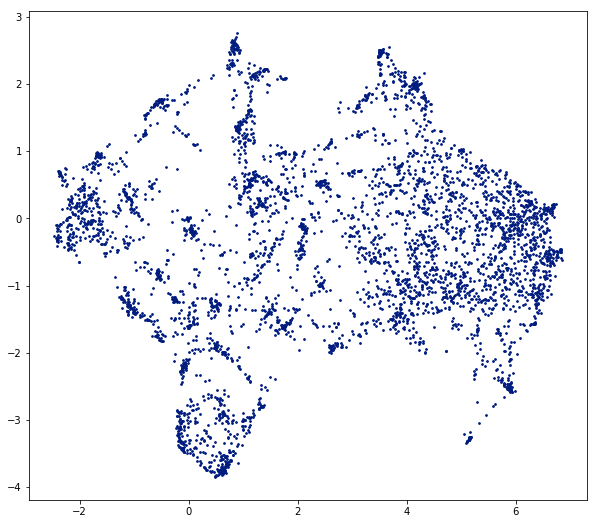

In [0]:
dct = Dictionary(clean_labels)
# print(list(dct.values()))
dct_set = set(dct.values())
dct_set = dct_set - set(['haemolymphoid', 'prezygapophysis', 'maculs', 'terryh', 'postzygapophysis'])  # 'gudden', 'terryh', 'haemolymphoid', 'masera', 'maculs'
X = model1[dct_set]
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')
plt.show()


2019-09-14 00:27:46,941 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-09-14 00:27:47,037 : INFO : adding document #10000 to Dictionary(4104 unique tokens: ['anatomic', 'structure', 'substance', 'system', 'lip']...)
2019-09-14 00:27:47,057 : INFO : built Dictionary(4366 unique tokens: ['anatomic', 'structure', 'substance', 'system', 'lip']...) from 12484 documents (total 43435 corpus positions)


[t-SNE] Computing 3 nearest neighbors...
[t-SNE] Indexed 4 samples in 0.000s...
[t-SNE] Computed neighbors for 4 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 4 / 4
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 23.934990
[t-SNE] KL divergence after 400 iterations: 0.048722


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


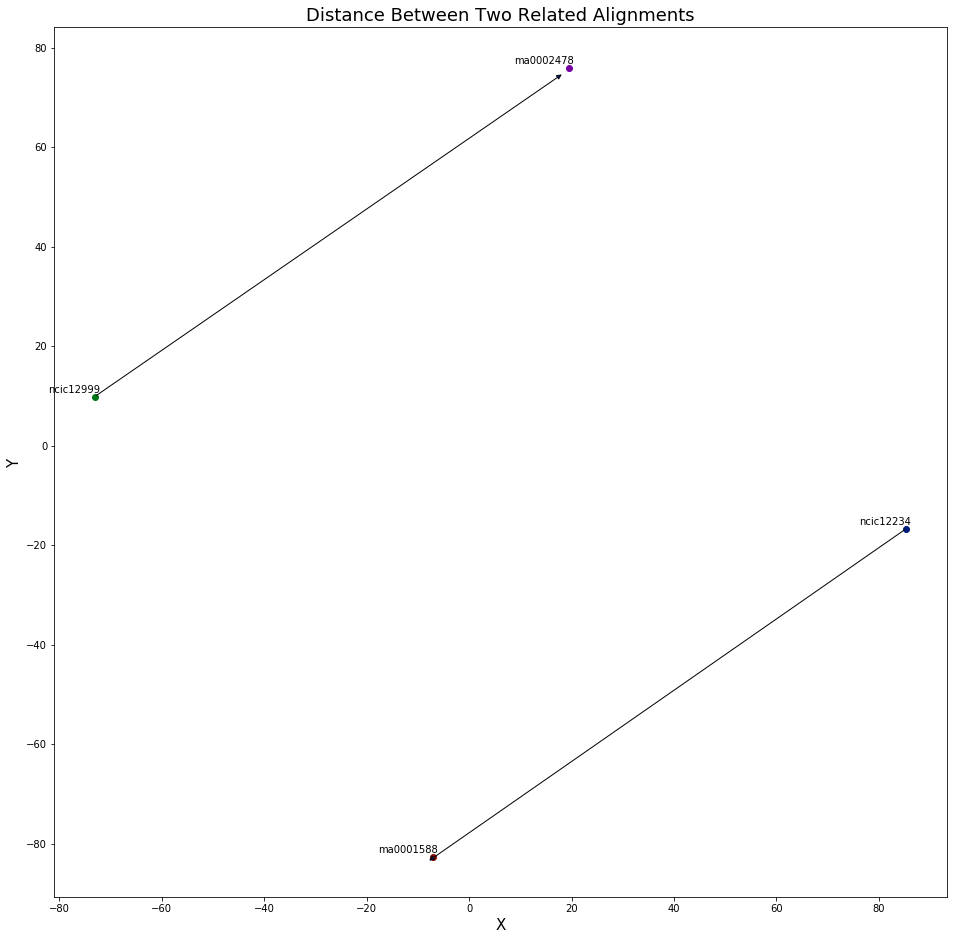

In [0]:
# ex = []
# ex.append(data[data['ID']=='ncic12412']['Value'])
# ex.append(data[data['ID']=='ma0000411']['Value'])
# ex.append(data[data['ID']=='ncic12722']['Value'])
# ex.append(data[data['ID']=='ma0000396']['Value'])
# emb = simple_average(clean_labels, model0)

file1_emb = simple_average(clean_labels1, new_vec1)
file2_emb = simple_average(clean_labels2, new_vec1)


##################################
from sklearn.manifold import TSNE
from __future__ import unicode_literals
dct = Dictionary(clean_labels)
dct_set = set(dct.values())
dct_set = dct_set - set(['prezygapophysis', 'terryh', 'haemolymphoid', 'maculs', 'postzygapophysis'])
def tsne_plot(model):
    
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    plt.rc('font', **{'sans-serif' : 'Arial', 'family' : 'sans-serif'})
    
    labels = ['ncic12234','ncic12999','ma0001588','ma0002478']
    for i, sent1 in enumerate(file1_emb):
        if (data1.loc[i, 'ID'] == 'ncic12234') or (data1.loc[i, 'ID'] == 'ncic12999'): 
            tokens.append(sent1)
    for j, sent2 in enumerate(file2_emb):
        if (data2.loc[j, 'ID'] == 'ma0001588') or (data2.loc[j, 'ID'] == 'ma0002478'): 
            tokens.append(sent2)

#     for i, sent1 in enumerate(file1_emb):
#         tokens.append(sent1)
#         labels.append(data1.loc[i, 'ID'])
#     for j, sent2 in enumerate(file2_emb):
#         tokens.append(sent2)
#         labels.append(data2.loc[j, 'ID'])
    
#     for word in dct_set:
#         tokens.append(model[word])
#         labels.append(word)
        
    
    tsne_model = TSNE(n_components=2, perplexity=40, metric='cosine', 
                      early_exaggeration=10.0, init='pca', 
                      verbose=True, n_iter=400)
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    return x, y, labels

x_axis, y_axis, labels_plot = tsne_plot(new_vec1)

list_of_tuples = list(zip(labels_plot, x_axis, y_axis))
# df_for_plot = pd.DataFrame(columns=['Name', 'X', 'Y'])
df_for_plot = pd.DataFrame(list_of_tuples, columns = ['Name', 'X', 'Y'])

plt.figure(figsize=(16, 16))
for i in range(len(x_axis)):
    plt.scatter(x_axis[i], y_axis[i])
    plt.annotate(labels_plot[i], 
                 xy=(x_axis[i], y_axis[i]), 
                 xytext=(5,2), 
                 textcoords='offset points', 
                 ha='right', 
                 va='bottom')

x11 = float(df_for_plot[df_for_plot['Name']=='ncic12234']['X'])
y11 = float(df_for_plot[df_for_plot['Name']=='ncic12234']['Y'])
x21 = float(df_for_plot[df_for_plot['Name']=='ncic12999']['X'])
y21 = float(df_for_plot[df_for_plot['Name']=='ncic12999']['Y'])
x12 = float(df_for_plot[df_for_plot['Name']=='ma0001588']['X'])
y12 = float(df_for_plot[df_for_plot['Name']=='ma0001588']['Y'])
x22 = float(df_for_plot[df_for_plot['Name']=='ma0002478']['X'])
y22 = float(df_for_plot[df_for_plot['Name']=='ma0002478']['Y'])
# plt.arrow(x11, y11,x12-x11,y12-y11-4, color='red',alpha=0.3, zorder=0, length_includes_head=True, overhang=0.8, head_width=0.1, head_length=0.15)
# plt.arrow(x21, y21,x22-x21-4,y22-y21, color='blue',alpha=0.3, zorder=0, length_includes_head=True, overhang=0.8, head_width=0.1, head_length=0.15)
plt.annotate('', xy=(x12-1,y12-1), xytext=(x11,y11), arrowprops={'arrowstyle': '-|>'})
plt.annotate('', xy=(x22-1,y22-1), xytext=(x21,y21), arrowprops={'arrowstyle': '-|>'})
plt.ylabel('Y', size = 15)
plt.xlabel('X', size = 15)
plt.title('Distance Between Two Related Alignments', size = 18)
# plt.savefig(root_path + 'another_avg_cosine' + '_align_dist.png', bbox_inches='tight')
# plt.clf()

plt.show()

In [0]:
print(df_for_plot)

        Name           X           Y
0  ncic12412    7.362408 -178.321625
1  ncic12722 -164.992035    2.220841
2  ma0000396  184.941360   -2.865971
3  ma0000411   12.532672  177.643250


In [0]:
# Install Altair and activate its colab renderer.
print("Installing Altair...")
!pip install git+git://github.com/altair-viz/altair.git
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('colab')
print("Done installing Altair.")


Installing Altair...
  Cloning git://github.com/altair-viz/altair.git to /tmp/pip-req-build-7z8ud2mf
  Running command git clone -q git://github.com/altair-viz/altair.git /tmp/pip-req-build-7z8ud2mf
  Created wheel for altair: filename=altair-3.3.0.dev0-py2.py3-none-any.whl size=598632 sha256=5069812340fc717d8bd1600a8779ea1ced82abe17a0b4d41d2e02f837059b535
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9loeht_/wheels/01/fd/91/025b6149b3949af76e93b3b3ceca5bf12cbdebc98fa46f9ec6
Successfully built altair
Done installing Altair.


In [0]:
# Interavtice altair
nearest = alt.selection(
    type='multi', encodings=['x', 'y'], on='mouseover', nearest=True,
    empty='none')



text = alt.Chart(df_for_plot).mark_text(align='left', dx=5, dy=-5).encode(
    x='X',
    y='Y',
    text=alt.condition(nearest, 'Name', alt.value('')))


base = alt.Chart(df_for_plot).mark_circle().encode(
    x='X',
    y='Y',
#     color=alt.condition(genre_filter, "genre", alt.value("whitesmoke")),
).properties(
    width=1200,
    height=900,
    selection=nearest).add_selection(
    scales
)

alt.layer(base, text)

In [0]:
# another one
scales = alt.selection_interval(bind='scales')

alt.Chart(df_for_plot).mark_point().encode(
    x='X:Q',
    y='Y:Q',
   
).add_selection(
    scales
)

In [0]:

#@ray.remote
@timing
def semantic_similarity1(clean_corpus, clean_file1, clean_file2, model, weigh_method='avg', sim_method='cosine',
                            threshold=0.8, str_threshold=0.8, alpha=0.5, f_threshold=0.6):
    import csv
    fields = ['ID1', 'ID2', 'sem_sim']  # 'str_sim', 'struc_sim'
    len1 = len(clean_file1)
    len2 = len(clean_file2)
    clean_nontok_file1 = [' '.join(sent) for sent in clean_file1]
    clean_nontok_file2 = [' '.join(sent) for sent in clean_file2]
    outfile = open(root_path + weigh_method + '_' + sim_method + '_new_results.csv', 'w+', newline='') # or 'a+'
    out_writer = csv.writer(outfile, delimiter=',')
    out_writer.writerow(fields)
    if weigh_method == 'avg':
        file1_emb = simple_average(clean_file1, model)
        file2_emb = simple_average(clean_file2, model)
        if sim_method == 'cosine':
            
            for i in tqdm(range(len1)):
                max_cosine = 0
                j_index = 0
                len_i = 1 / len(clean_file1[i])
                for j in range(len2):
#                     simm = 1 - cosine(file1_emb[i], file2_emb[j])
                    cosine_list = []
                    for w in clean_file1[i]:
                        if w in model:
                            cosine_list.append(cosine(model[w], file2_emb[j]))
                    delta12 = len_i * sum(cosine_list)
                    cosine_list = []
                    for w in clean_file2[j]:
                        if w in model:
                            cosine_list.append(cosine(model[w], file1_emb[i]))
                    delta21 = (1 / len(clean_file2[j])) * sum(cosine_list)
                    simm = 1 - max(delta12, delta21)
                    if simm >= max_cosine:
                        max_cosine = simm
                        j_index = j
                if max_cosine >= threshold:
#                         strsim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
#                         if strsim >= str_threshold:
                    row = []
                    row.append(data1.at[i, 'ID']) # data1.at[i, 'ID'] or data1.loc[i, 'ID']
                    row.append(data2.at[j_index, 'ID'])
                    row.append(max_cosine)
                    out_writer.writerow(row)
                

            # by Cosine Sim pairwise
            # sims = cosine_similarity(file1_emb, file2_emb)
            # for i in tqdm(range(len1)):
            #     for j in range(len2):
            #         if sims[i][j] >= threshold:
            #             row = []
            #             row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
            #             row.append(data2.loc[j, 'ID'])
            #             row.append(sims[i][j])
            #             out_writer.writerow(row)

            # by Cosine Distance
#             for i in tqdm(range(len1)):
#                 max_sim = 0
#                 j_index = 0
#                 for j in range(len2):
#                     # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
#                     str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
#                     sim = 1 - cosine(file1_emb[i], file2_emb[j])
#                     f_sim = (alpha * str_sim) + ((1 - alpha) * sim)
#                     if f_sim >= max_sim:
#                         j_index = j
#                         max_sim = f_sim        
#                 if max_sim >= f_threshold:
#                     row = []
#                     row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
#                     row.append(data2.loc[j_index, 'ID'])
#                     row.append(max_sim)
#                     out_writer.writerow(row)
            

#             for i in tqdm(range(len1)):
#                 max_sim = 0
#                 j_index = 0
#                 for j in range(len2):
#                     # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
#                     str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
#                     # str_sim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
#                     if str_sim >= str_threshold:
#                         sim = 1 - cosine(file1_emb[i], file2_emb[j])
#                         if sim >= max_sim:
#                             j_index = j
#                             max_sim = sim        
#                 if max_sim >= threshold:
#                     row = []
#                     row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
#                     row.append(data2.loc[j_index, 'ID'])
#                     row.append(max_sim)
#                     out_writer.writerow(row)
    
            
#             # with str sim            
#             for i in tqdm(range(len1)):
#                 max_sim = 0
#                 j_index = 0
#                 for j in range(len2):
#                     # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
#                     str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
#                     # str_sim = similarity(clean_nontok_file1[i],clean_nontok_file2[j])
#                     if str_sim >= max_sim:
#                         j_index = j
#                         max_sim = str_sim        
#                 if max_sim >= str_threshold:
#                     sim = 1 - cosine(file1_emb[i], file2_emb[j_index])
#                     if sim >= threshold:
#                         row = []
#                         row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
#                         row.append(data2.loc[j_index, 'ID'])
#                         row.append(max_sim)
#                         out_writer.writerow(row)

#############

#                 else:
#                     sim = 1 - cosine(file1_emb[i], file2_emb[j_index])
#                     if sim >= threshold:
#                         row = []
#                         row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
#                         row.append(data2.loc[j_index, 'ID'])
#                         row.append(max_sim)
#                         out_writer.writerow(row)
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(file1_emb[i],file2_emb[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'tfidf-emb':
        #file1_tf = tfidf_v1(clean_corpus, model, clean_file1)
        #file2_tf = tfidf_v1(clean_corpus, model, clean_file2)
        file1_tf = tf_idf_v2(clean_corpus, model, clean_file1)
        file2_tf = tf_idf_v2(clean_corpus, model, clean_file2)
        if sim_method == 'cosine':
            # by Cosine Sim pairwise
            # sims = cosine_similarity(file1_tf, file2_tf)
            # for i in tqdm(range(len1)):
            #     for j in range(len2):
            #         if sims[i][j] >= threshold:
            #             row = []
            #             row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
            #             row.append(data2.loc[j, 'ID'])
            #             row.append(sims[i][j])
            #             out_writer.writerow(row)

            # by Cosine Distance
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
                    str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    if str_sim >= max_sim:
                        j_index = j
                        max_sim = str_sim        
                if max_sim >= str_threshold:
                    sim = 1 - cosine(file1_tf[i], file2_tf[j_index])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j_index, 'ID'])
                        row.append(max_sim)
                        out_writer.writerow(row)        
        elif sim_method == 'ts-ss':
            # using a function
            # sims = tfidf_soft_cosine_TSSS(clean_corpus, clean_file1, clean_file2, model)
            # for i in tqdm(range(len1)):
            #     for j in range(len2):
            #         if sims[i][j] >= threshold:
            #             row = []
            #             row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
            #             row.append(data2.loc[j, 'ID'])
            #             row.append(sims[i][j])
            #             out_writer.writerow(row)
            ######
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(file1_tf[i], file2_tf[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'tfidf':
        clean_nontok_file1 = [' '.join(sent) for sent in clean_file1]
        clean_nontok_file2 = [' '.join(sent) for sent in clean_file2]
        vectorizer = TfidfVectorizer()  # (preprocessor=nlp.clean_tf_idf_text)
        docs_tfidf1 = vectorizer.fit_transform(clean_nontok_file1)
        docs_tfidf2 = vectorizer.fit_transform(clean_nontok_file2)
        # query_tfidf = vectorizer.transform([query])
        if sim_method == 'cosine':
            # by Cosine Sim pairwise
            # sims = cosine_similarity(docs_tfidf1, docs_tfidf2)
            # for i in tqdm(range(len1)):
            #     for j in range(len2):
            #         if sims[i][j] >= threshold:
            #             row = []
            #             row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
            #             row.append(data2.loc[j, 'ID'])
            #             row.append(sims[i][j])
            #             out_writer.writerow(row)

            # by Cosine Distance
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = 1 - cosine(docs_tfidf1[i], docs_tfidf2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(docs_tfidf1[i], docs_tfidf2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'sif':
#         file1_sif = smooth_inverse_frequency(clean_file1, model)
#         file2_sif = smooth_inverse_frequency(clean_file2, model)
        file1_sif = sif_embeddings1(clean_file1, model)
        file2_sif = sif_embeddings1(clean_file2, model)
        if sim_method == 'cosine':
            # by Cosine Sim pairwise
            # sims = cosine_similarity(file1_sif, file2_sif)
            # for i in tqdm(range(len1)):
            #     for j in range(len2):
            #         if sims[i][j] >= threshold:
            #             row = []
            #             row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
            #             row.append(data2.loc[j, 'ID'])
            #             row.append(sims[i][j])
            #             out_writer.writerow(row)

            # by Cosine Distance
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
                    str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    if str_sim >= max_sim:
                        j_index = j
                        max_sim = str_sim        
                if max_sim >= str_threshold:
                    sim = 1 - cosine(file1_sif[i], file2_sif[j_index])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j_index, 'ID'])
                        row.append(max_sim)
                        out_writer.writerow(row)      
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(file1_sif[i], file2_sif[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'non-vector':
        if sim_method == 'n-sim':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = model.wv.n_similarity(clean_file1[i], clean_file2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        elif sim_method == 'wmd':
            # by wmdDistance
            for i in tqdm(range(len1)):
                for j in range(len2):
                    dis = word_mover_distance(clean_file1[i], clean_file2[j], model)
                    sim = 1 / (1 + dis)
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        out_writer.writerow(row)

#             # by WmdSimilarity
#             for i in tqdm(range(len1)):
#                 sims = wmd_gensim(clean_file1[i], clean_file2, model)
#                 for j in range(len2):
#                     if sims[j] >= threshold:
#                         row = []
#                         row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
#                         row.append(data2.loc[j, 'ID'])
#                         row.append(sims[j])
#                         out_writer.writerow(row)
        elif sim_method == 'soft':
#             # by function 1
#             for i in tqdm(range(len1)):
#                 sim = soft_cosine_sim(model, clean_file1[i], clean_corpus, clean_file2, True)
#                 for j in range(len2):
#                     if sim[j] >= threshold:
#                         row = []
#                         row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
#                         row.append(data2.loc[j, 'ID'])
#                         row.append(sim[j])
#                         out_writer.writerow(row)
            
#             # by function 2
#             for i in tqdm(range(len1)):
#                 sim = softcossimilarity(model, clean_file1[i], clean_corpus, clean_file2)
#                 for j in range(len2):
#                     if sim[j] >= threshold:
#                         row = []
#                         row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
#                         row.append(data2.loc[j, 'ID'])
#                         row.append(sim[j])
#                         out_writer.writerow(row)

            # without any functions

#             # by softcossim: DEPRECATED
#             termsim_index = WordEmbeddingSimilarityIndex(model.wv)  # Any trained model
#             # Prepare a dictionary and a corpus.
#             dictionary = Dictionary(clean_corpus)
#             tf_idf = TfidfModel(dictionary=dictionary)
            
#             # Prepare the similarity matrix
#             # Deprecated (with problem)
#             # similarity_matrix = model.similarity_matrix(dictionary, tfidf=tf_idf, threshold=0.0, exponent=2.0, nonzero_limit=100)  # tfidf=None
            
#             similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tf_idf)  # construct similarity matrix
#             # bow_corpus = [dictionary.doc2bow(document) for document in clean_corpus]
#             bow_corpus1 = [dictionary.doc2bow(document) for document in clean_file1]
#             bow_corpus2 = [dictionary.doc2bow(document) for document in clean_file2]
#             # Compute soft cosine similarity
#             for i in tqdm(range(len1)):
#                 for j in range(len2):
#                     sim = softcossim(bow_corpus1[i], bow_corpus2[j], similarity_matrix) # Deprecated
#                     if sim >= threshold:
#                         row = []
#                         row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
#                         row.append(data2.loc[j, 'ID'])
#                         row.append(sim)
#                         out_writer.writerow(row)

            # by inner_product
            termsim_index = WordEmbeddingSimilarityIndex(model.wv)  # Any trained model
            dictionary = Dictionary(clean_corpus)
            tfidf_model = TfidfModel(dictionary=dictionary)
            similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary,
                                                           tfidf_model)  # construct similarity matrix
            bow_corpus1 = [dictionary.doc2bow(document) for document in clean_file1]
            bow_corpus2 = [dictionary.doc2bow(document) for document in clean_file2]
            # Compute soft cosine similarity
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
                    str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    if str_sim >= max_sim:
                        j_index = j
                        max_sim = str_sim        
                if max_sim >= str_threshold:
                    sim = similarity_matrix.inner_product(bow_corpus1[i], bow_corpus2[j_index], normalized=True) # return SCM
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j_index, 'ID'])
                        row.append(max_sim)
                        out_writer.writerow(row)       
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'fse':
        from fse.models import Sentence2Vec
        from fse.models.sentence2vec import CY_ROUTINES
        # assert CY_ROUTINES
        fse_model = Sentence2Vec(model)
        # fse_embed1 = fse_model.train(clean_corpus)
        fse_embed1 = fse_model.train(clean_file1)
        fse_embed2 = fse_model.train(clean_file2)
        fse_model.normalize(fse_embed1)
        fse_model.normalize(fse_embed2)
        # fse_embed1 = list(fse_embed1)
        # fse_embed2 = list(fse_embed2)
        if sim_method == 'cosine':
            # by Cosine Sim pairwise
            # sim = cosine_similarity(fse_embed1, fse_embed2)
            # for i in tqdm(range(len1)):
            #     for j in range(len2):
            #         if sims[i][j] >= threshold:
            #             row = []
            #             row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
            #             row.append(data2.loc[j, 'ID'])
            #             row.append(sims[i][j])
            #             out_writer.writerow(row)

            # by Cosine Distance
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = 1 - cosine(fse_embed1[i], fse_embed2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        elif sim_method == 'ts-ss':
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(fse_embed1[i], fse_embed2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')

    elif weigh_method == 'spacy':
        if sim_method == 'cosine':
            spacy_emb1 = sentence_mean(nlp, clean_file1)
            spacy_emb2 = sentence_mean(nlp, clean_file2)
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = 1 - cosine(spacy_emb1[i], spacy_emb2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        elif sim_method == 'ts-ss':
            spacy_emb1 = sentence_mean(nlp, clean_file1)
            spacy_emb2 = sentence_mean(nlp, clean_file2)
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(spacy_emb1[i], spacy_emb2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        elif sim_method == 'spacy':
            nlpp = spacy.load('en_core_web_sm')
            doc1 = []
            doc2 = []
            for i in tqdm(range(len1)):
                doc1.append(nlpp(' '.join(clean_file1[i])))
            for j in tqdm(range(len2)):
                doc2.append(nlpp(' '.join(clean_file2[j])))
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = doc1[i].similarity(doc2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'wordnet':
        from wnet import similarity
        for i in tqdm(range(len1)):
            sent1 = clean_file1[i]
            for j in range(len2):
                sim = similarity(sent1, clean_file2[j], True)
                if sim >= threshold:
                    row = []
                    row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                    row.append(data2.loc[j, 'ID'])
                    row.append(sim)
                    out_writer.writerow(row)
    elif weigh_method == 'infersent-glove':
        from infersentmodel import InferSent
        clean_nontok_corpus = [' '.join(sent) for sent in clean_corpus]
        infer_model, emb1, emb2 = infersent_v1(clean_nontok_corpus, clean_nontok_file1, clean_nontok_file2, ver=1,
                                               model_path=root_path + 'encoder/', glove_path=bio_data2)
        if sim_method == 'cosine':
            # sim = 1 - cosine(infer_model.encode(['the cat eats.'])[0], infer_model.encode(['the cat drinks.'])[0])
            # by Cosine Distance
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
                    str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    if str_sim >= max_sim:
                        j_index = j
                        max_sim = str_sim        
                if max_sim >= str_threshold:
                    sim = 1 - cosine(emb1[i], emb2[j_index])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j_index, 'ID'])
                        row.append(max_sim)
                        out_writer.writerow(row)       
        elif sim_method == 'ts-ss':
            # sim = TS_SS(infer_model.encode(['the cat eats.'])[0], infer_model.encode(['the cat drinks.'])[0])
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(emb1[i], emb2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID'])  # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'infersent-fasttext':
        from infersentmodel import InferSent
        clean_nontok_corpus = [' '.join(sent) for sent in clean_corpus]
        infer_model, emb1, emb2 = infersent_v1(clean_nontok_corpus, clean_nontok_file1, clean_nontok_file2, ver=2, model_path=root_path + 'encoder/', fasttext_path=google_pretrained_model)
        if sim_method == 'cosine':
            # sim = 1 - cosine(infer_model.encode(['the cat eats.'])[0], infer_model.encode(['the cat drinks.'])[0])
            # by Cosine Distance
            for i in tqdm(range(len1)):
                max_sim = 0
                j_index = 0
                for j in range(len2):
                    # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
                    str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    if str_sim >= max_sim:
                        j_index = j
                        max_sim = str_sim        
                if max_sim >= str_threshold:
                    sim = 1 - cosine(emb1[i], emb2[j_index])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j_index, 'ID'])
                        row.append(max_sim)
                        out_writer.writerow(row)                   
        elif sim_method == 'ts-ss':
            # sim = TS_SS(infer_model.encode(['the cat eats.'])[0], infer_model.encode(['the cat drinks.'])[0])
            for i in tqdm(range(len1)):
                for j in range(len2):
                    sim = TS_SS(emb1[i], emb2[j])
                    if sim >= threshold:
                        row = []
                        row.append(data1.loc[i, 'ID']) # data1.at[i, 'ID']
                        row.append(data2.loc[j, 'ID'])
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    elif weigh_method == 'doc2vec':
        #from d2v import d2v_method
        d2v_tags = [text for text in data['ID']]
        d2v_model = d2v_method(clean_corpus, d2v_tags, max_epochs=100, loading=True)
        if sim_method == 'cosine':
            for i, id1 in tqdm(enumerate(data1['ID'])):
                id1_vec = d2v_model.docvecs[id1]
                max_sim = 0
                id2_new = ''
                for j, id2 in enumerate(data2['ID']):
                    # str_sim = trigram_sim(clean_file1[i], clean_file2[j])
                    str_sim = fuzz.token_sort_ratio(clean_nontok_file1[i],clean_nontok_file2[j]) / 100
                    if str_sim >= max_sim:
                        id2_new = id2
                        max_sim = str_sim        
                if max_sim >= str_threshold:
                    sim = 1 - cosine(id1_vec, d2v_model.docvecs[id2_new])
                    if sim >= threshold:
                        row = []
                        row.append(id1)
                        row.append(id2_new)
                        row.append(max_sim)
                        out_writer.writerow(row)                           
        elif sim_method == 'ts-ss':
            for id1 in tqdm(data1['ID']):
                id1_vec = d2v_model.docvecs[id1]
                for id2 in data2['ID']:
                    sim = TS_SS(id1_vec, d2v_model.docvecs[id2])
                    if sim >= threshold:
                        row = []
                        row.append(id1)
                        row.append(id2)
                        row.append(sim)
                        out_writer.writerow(row)
        else:
            print('Similarity Method Error: Unfortunately, the entered similarity method "' + sim_method +
                  '" is not defined in this weighing method "' + weigh_method + '"')
    else:
        print('Weighing Method Error: Unfortunately, the entered weighing method "' + weigh_method +
              '" is not defined in this function')
    outfile.close()
    return



#@ray.remote


In [0]:
#from ts_ss import TS_SS
#from gensim.models.doc2vec import Doc2Vec, TaggedDocument
semantic_similarity1(clean_labels, clean_labels1, clean_labels2,  new_vec1, weigh_method='avg', sim_method='cosine', threshold=0.8, str_threshold=0.9, alpha=0.9, f_threshold=0.8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars

100%|██████████| 3298/3298 [38:48<00:00,  1.47it/s]


semantic_similarity1 function took 2328.5277 (s)


In [0]:
evaluation(root_path + 'reff.csv', root_path + 'avg_cosine_new_results.csv', 3298, 2737, pr=True)

False Positive Rate: 0.00 %
Precision: 0.79 %
Recall: 0.48 %
F1-Measure: 0.60 %
Predicted Positive Condition Rate (PPCR): 0.01 %
Balanced Accuracy: 50.24 %
Matthews Correlation Coefficient (MCC): 61.47 %


(721, 187, 9024924, 794, 1515, 9025111, 9026626)

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import auc
import seaborn as sns

from IPython.core.pylabtools import figsize

figsize(10, 8)

results = pd.DataFrame({'threshold': [],
                        'tp': [],
                        'fp': [],
                        'tn': []
                       })
roc = pd.DataFrame({'threshold': [],
                        'tp': [],
                        'fp': [],
                        'tn': [],
                        'fn': []
                       })
#sns.heatmap(results)

In [0]:
results.at[0] = [0,2,965.48]+[777]
results.at[1] = [0.1,2,5,4]
results.at[2] = [0,7,5,4]
results.at[3] = [0,6,8]+[777]
results.at[4] = [0.1,3,5,4]
results.at[5] = [0.2,2,5,4]
results.at[6] = [0,2,958]+[777]
results.at[7] = [0.1,2,5,4]
results.at[8] = [0.2,2,5,4]
print(results['fp'])
# qq = pd.DataFrame({'tp': [], 'fp': []})

# qq = qq.append({'tp': 23, 'fp': 29}, ignore_index=True)
# #qq = qq.append({'fp': 29}, ignore_index=True)
# for d,g in zip(results['tp'],results['fp']): 
#     qq = qq.append({'tp': d, 'fp': g}, ignore_index=True)
# ss = results['tp']
# qq = qq.append(ss, ignore_index=True)

ss = results[(results['threshold']==min(results['threshold'])) & (results['fp'] < 10)]['tp']
results['tp'] = [1,2,3,4,5,6,7,8,9]
# ss.loc[ss.index.max()+1] = 14555
# for a,x in enumerate(results.iterrows()):
#     ss = x[1]
#     roc.at[a] = ss + [89]
print(results)
# qq = qq.sort_values(by=['tp'])
# print(qq)
# roc.at[0] = [89] + ss
# roc.at[1] = ss + [83434]
# roc.at[2] = ss + [234]
# print(roc)
#thresholds = [(round(t,1)) for t in np.arange(0,1.1,0.1)]
#thresholds

In [0]:
import pandas as pd

d1 = {
         'Code': [1, 2, 3],
         'Name': ['Company1', 'Company2', 'Company3'],
         #'Value': [200, 300, 400],

    }
df1 = pd.DataFrame(d1, columns= ['Code','Name','Value'])

d2 = {
         'Code': [2],
         'Name': ['Company2'],
         #'Value': [1000],
    }

df2 = pd.DataFrame(d2, columns= ['Code','Name','Value'])

In [0]:
print(pd.concat([df1,df2]).drop_duplicates(['Code','Name'],keep='last', inplace=False))

   Code      Name  Value
0     1  Company1    200
2     3  Company3    400
0     2  Company2   1000


In [0]:
#from shorttext.metrics.dynprog import damerau_levenshtein, longest_common_prefix, similarity, soft_jaccard_score
#print(jaccardscore_sents('foot interosseous muscle', 'hand interosseous muscle',model0)) # not working
#print(jaccardscore_sents('foot interosseous muscle', 'foot interosseus muscle',model0))
# print(damerau_levenshtein('foot interosseous muscle', 'hand interosseous muscle'))
# print(damerau_levenshtein('foot interosseous muscle', 'foot interosseus muscle'))
# print(similarity('foot interosseous muscle', 'hand interosseous muscle'))
# print(similarity('foot interosseous muscle', 'foot interosseus muscle'))
# print(word_mover_distance(['foot', 'interosseous', 'muscle'],['hand', 'interosseous', 'muscle'],model0))
# print(word_mover_distance(['foot', 'interosseous', 'muscle'],['foot', 'interosseus', 'muscle'],model0))
# print(fuzz.token_sort_ratio('special sense organ system', 'sensory organ system'))

In [0]:
import numpy as np
cm = np.array([[1,2],[3,4]])
confusion_matrix(cm, ['Not-Aligned','Aligned'], '---')

In [0]:
from gensim.corpora import Dictionary
corpus = [["this", "is","just","lip", "sparta"], ["just","sparta" ,"joking"],["sparta"]]
dct = Dictionary(corpus)
x = set(dct.values())
print(x - set(['this']))
for i in x:
    if i=='lip':
        print('True')
        print(model0.wv['jo'])
    else:
        print('False')

{'sparta', 'just', 'joking', 'is', 'lip'}
False
False
False
False
False
True
[ 1.75446063e-01  6.62247911e-02  2.42915619e-02  2.93574072e-02
 -5.13777658e-02 -2.86883619e-02  9.51256976e-02  4.47030924e-02
  9.30846334e-02 -2.81733777e-02 -2.86857206e-02 -3.50415483e-02
  9.08759087e-02  1.75501760e-02  5.24480455e-02 -7.24539347e-03
 -4.12286036e-02 -7.29398355e-02 -8.63622129e-02  4.17500362e-02
  4.44314145e-02  1.09633878e-02  1.21694371e-01 -7.42075145e-02
  3.49087864e-02 -9.12066922e-02 -1.97975084e-01  7.36859962e-02
 -3.98806818e-02  1.70220677e-02  3.20045352e-02  4.27902341e-02
 -3.46376337e-02  4.15540747e-02 -1.33130267e-01  4.79753762e-02
 -2.78375167e-02  2.48992466e-03 -1.26105160e-01  1.20157741e-01
  8.70807618e-02  4.35581245e-02 -4.73390073e-02  4.99032140e-02
 -4.80468906e-02  6.29712194e-02 -8.04155618e-02 -9.42437053e-02
  1.16951421e-01  7.90290236e-02  1.14991693e-02  1.48564884e-02
  1.31280767e-02  4.27609012e-02  2.64171176e-02  4.55343118e-03
 -4.51924950e

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [0]:
import spacy
import wmd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(wmd.WMD.SpacySimilarityHook(nlp), last=True)
doc1 = nlp("Politician speaks to the media in Illinois.")
doc2 = nlp("The president greets the press in Chicago.")
print(doc1.similarity(doc2))